In [1]:
import os
import tarfile
import pandas as pd
import email
from email.policy import default
from multiprocessing import Pool, cpu_count

tar_gz_path = '/uufs/chpc.utah.edu/common/home/u6060602/anibal/enron_email_analysis/enron_mail_20150507_.tar.gz'
extract_path = '/uufs/chpc.utah.edu/common/home/u6060602/anibal/enron_email_analysis/extracted_emails'

## Import data

In [ ]:
######## NO CORRER #################

# Para extraer de .tar.gz
def extract_tar_gz(tar_gz_path, extract_path):
    with tarfile.open(tar_gz_path, 'r:gz') as tar:
        tar.extractall(path=extract_path)
        
# Descomprimir el archivo .tar.gz
if not os.path.exists(extract_path):
    extract_tar_gz(tar_gz_path, extract_path)

# lay-k only

### test

In [2]:
emails_path = '/uufs/chpc.utah.edu/common/home/u6060602/anibal/enron_email_analysis/extracted_emails/maildir/lay-k'

for directory, subdirectory, filenames in os.walk(emails_path):
    print(directory, subdirectory, len(filenames))

/uufs/chpc.utah.edu/common/home/u6060602/anibal/enron_email_analysis/extracted_emails/maildir/lay-k ['all_documents', 'notes_inbox', 'calendar', 'business', 'inbox', 'discussion_threads', 'enron', 'sent', 'compaq', 'sec_panel', 'sent_items', '_sent', 'elizabeth', 'family', 'deleted_items'] 0
/uufs/chpc.utah.edu/common/home/u6060602/anibal/enron_email_analysis/extracted_emails/maildir/lay-k/all_documents [] 1127
/uufs/chpc.utah.edu/common/home/u6060602/anibal/enron_email_analysis/extracted_emails/maildir/lay-k/notes_inbox [] 799
/uufs/chpc.utah.edu/common/home/u6060602/anibal/enron_email_analysis/extracted_emails/maildir/lay-k/calendar [] 8
/uufs/chpc.utah.edu/common/home/u6060602/anibal/enron_email_analysis/extracted_emails/maildir/lay-k/business [] 2
/uufs/chpc.utah.edu/common/home/u6060602/anibal/enron_email_analysis/extracted_emails/maildir/lay-k/inbox [] 1373
/uufs/chpc.utah.edu/common/home/u6060602/anibal/enron_email_analysis/extracted_emails/maildir/lay-k/discussion_threads [] 91

In [2]:
import os
from collections import Counter
from email.parser import Parser

def email_analyse(inputfile, to_email_list, from_email_list, email_body):
    with open(inputfile, "r") as f:
        data = f.read()

    email = Parser().parsestr(data)
    
    if email['to']:
        email_to = email['to']
        email_to = email_to.replace("\n", "")
        email_to = email_to.replace("\t", "")
        email_to = email_to.replace(" ", "")

        email_to = email_to.split(",")

        for email_to_1 in email_to:
            to_email_list.append(email_to_1)

    from_email_list.append(email['from'])
    
    email_body.append(email.get_payload())

In [3]:
to_email_list = []
from_email_list = []
email_body = []

rootdir = '/uufs/chpc.utah.edu/common/home/u6060602/anibal/enron_email_analysis/extracted_emails/maildir/lay-k'

for directory, subdirectory, filenames in os.walk(rootdir):
    for filename in filenames:
        #print(os.path.join(directory, filename))
        email_analyse(os.path.join(directory, filename), to_email_list, from_email_list, email_body )

print("\nTo email adresses: \n")
print(Counter(to_email_list).most_common(10))

print("\nFrom email adresses: \n")
print(Counter(from_email_list).most_common(10))

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 311: invalid start byte

In [4]:
test_dir = '/uufs/chpc.utah.edu/common/home/u6060602/anibal/enron_email_analysis/extracted_emails/maildir/lay-k/all_documents/604.'

a = open(test_dir, "r")
a.read()

with open(test_dir, "r") as file:
    # Leer el contenido del archivo
    content = file.read()
    
#print(content)

email_analyse(test_dir, to_email_list, from_email_list, email_body )

In [5]:
to_email_list, from_email_list, email_body

(['kenneth.lay@enron.com',
  'cynthia.sandherr@enron.com',
  'tom.briggs@enron.com',
  'chris.long@enron.com',
  'stephen.burns@enron.com',
  'john.fugh@enron.com',
  'kenneth.lay@enron.com',
  'kenneth.lay@enron.com',
  'lizard_ar@yahoo.com',
  'kenneth.lay@enron.com',
  'michael.goldberg@bakerbotts.com',
  'executive.list@enron.com',
  'john.garrison@enron.com',
  'kenneth.lay@enron.com',
  'swhalen@calstate.edu',
  'savont@email.msn.com',
  'gsmith@pstrategies.com',
  'georgep@rocketball.com',
  'dlaine@pstrategies.com',
  'bmiller@hillcopartners.com',
  'mikeb@baselice.com',
  'mbecker2@mindspring.com',
  'jeffrey.garten@yale.edu',
  'news@newsworld.co.uk',
  'barbette_watts@i2.com',
  'alliancetosaveenergy@ase.org',
  'energynews@peach.ease.lsoft.com',
  'kenneth.lay@enron.com',
  'alfred.gilman@email.swmed.edu',
  'george.fisher@kodak.com',
  'jterzuoli@ibjwhitehall.com',
  'karen.n.horn@marsh.com',
  'kenneth.lay@enron.com',
  'kseifert@kcc.com',
  'prendergast@mayo.edu',
  'scb

In [ ]:
from_email_list = []
to_email_list = []
email = Parser().parsestr(content)

if email['to']:
        email_to = email['to']
        email_to = email_to.replace("\n", "")
        email_to = email_to.replace("\t", "")
        email_to = email_to.replace(" ", "")

        email_to = email_to.split(",")

        for email_to_1 in email_to:
            to_email_list.append(email_to_1)

from_email_list.append(email['from'])

from_email_list; to_email_list

### end tests

## lay-k data

In [11]:
import os
from collections import Counter
from email.parser import Parser

def email_analyse(inputfile, to_email_list, from_email_list, email_body):
    try:
        with open(inputfile, "r", encoding='utf-8') as f:
            data = f.read()
    except UnicodeDecodeError:
        with open(inputfile, "r", encoding='latin-1') as f:
            data = f.read()

    email = Parser().parsestr(data)
    
    if email['to']:
        email_to = email['to']
        email_to = email_to.replace("\n", "")
        email_to = email_to.replace("\t", "")
        email_to = email_to.replace(" ", "")

        email_to = email_to.split(",")

        for email_to_1 in email_to:
            to_email_list.append(email_to_1)

    from_email_list.append(email['from'])
    
    email_body.append(email.get_payload())


In [ ]:
rootdir = '/uufs/chpc.utah.edu/common/home/u6060602/anibal/enron_email_analysis/extracted_emails/maildir/lay-k'

to_email_list = []
from_email_list = []
email_body = []

for directory, subdirectory, filenames in os.walk(rootdir):
    for filename in filenames:
        email_analyse(os.path.join(directory, filename), to_email_list, from_email_list, email_body)

In [6]:
len(to_email_list), len(from_email_list), len(email_body)

(34297, 5937, 5937)

In [7]:
print("\nTo email adresses: \n")
print(Counter(to_email_list).most_common(10))

print("\nFrom email adresses: \n")
print(Counter(from_email_list).most_common(10))


To email adresses: 

[('kenneth.lay@enron.com', 2039), ('klay@enron.com', 1903), ('jeff.skilling@enron.com', 372), ('mark.koenig@enron.com', 313), ('mark.frevert@enron.com', 304), ('greg.whalley@enron.com', 304), ('steven.kean@enron.com', 278), ('mike.mcconnell@enron.com', 261), ('jeffrey.mcmahon@enron.com', 251), ('john.sherriff@enron.com', 244)]

From email adresses: 

[('rosalee.fleming@enron.com', 856), ('brown_mary_jo@lilly.com', 82), ('leonardo.pacheco@enron.com', 78), ('savont@email.msn.com', 66), ('tori.wells@enron.com', 58), ('elizabeth.davis@compaq.com', 50), ('no.address@enron.com', 47), ('katherine.brown@enron.com', 47), ('mrslinda@lplpi.com', 40), ('lizard_ar@yahoo.com', 36)]


In [9]:
with open("to_email_list_lay-k.txt", "w") as f:
    for to_email in to_email_list:
        if to_email:
            f.write(to_email)
            f.write("\n")

with open("from_email_list_lay-k.txt", "w") as f:
    for from_email in from_email_list:
        if from_email:
            f.write(from_email)
            f.write("\n")        

with open("email_body_lay-k.txt", "w") as f:
    for email_bod in email_body:
        if email_bod:
            f.write(email_bod)
            f.write("\n")   

In [2]:
with open("to_email_list_lay-k.txt", "r") as f:
    to_email_list = [line.strip() for line in f.readlines()]

with open("from_email_list_lay-k.txt", "r") as f:
    from_email_list = [line.strip() for line in f.readlines()]

with open("email_body_lay-k.txt", "r") as f:
    email_body = [line.strip() for line in f.readlines()]

### Obtain Date from mails

In [4]:
import os
from email.parser import Parser

def extract_email_date(inputfile, email_date_list):
    try:
        with open(inputfile, "r", encoding='utf-8') as f:
            data = f.read()
    except UnicodeDecodeError:
        with open(inputfile, "r", encoding='latin-1') as f:
            data = f.read()

    email = Parser().parsestr(data)
    
    if email['date']:
        email_date_list.append(email['date'])

In [4]:
email_date_list = []

rootdir = '/uufs/chpc.utah.edu/common/home/u6060602/anibal/enron_email_analysis/extracted_emails/maildir/lay-k'

for directory, subdirectory, filenames in os.walk(rootdir):
    for filename in filenames:
        extract_email_date(os.path.join(directory, filename), email_date_list)

In [5]:
with open("email_date_list_lay-k.txt", "w") as f:
    for email_date in email_date_list:
        if email_date:
            f.write(email_date)
            f.write("\n")

In [3]:
with open("email_date_list_lay-k.txt", "r") as f:
    email_date_list = [line.strip() for line in f.readlines()]

In [6]:
print(email_date_list[:10])

['Tue, 17 Oct 2000 03:39:00 -0700 (PDT)', 'Wed, 13 Sep 2000 09:25:00 -0700 (PDT)', 'Thu, 21 Sep 2000 02:54:00 -0700 (PDT)', 'Thu, 10 Aug 2000 03:27:00 -0700 (PDT)', 'Mon, 25 Sep 2000 09:59:00 -0700 (PDT)', 'Thu, 5 Oct 2000 11:32:00 -0700 (PDT)', 'Fri, 1 Sep 2000 03:40:00 -0700 (PDT)', 'Wed, 6 Sep 2000 11:12:00 -0700 (PDT)', 'Wed, 16 May 2001 09:21:00 -0700 (PDT)', 'Wed, 25 Oct 2000 06:55:00 -0700 (PDT)']


# All data

In [ ]:
import os
from collections import Counter
from email.parser import Parser

def email_analyse(inputfile, to_email_list, from_email_list, email_body):
    with open(inputfile, "r") as f:
        data = f.read()

    email = Parser().parsestr(data)
    
    if email['to']:
        email_to = email['to']
        email_to = email_to.replace("\n", "")
        email_to = email_to.replace("\t", "")
        email_to = email_to.replace(" ", "")

        email_to = email_to.split(",")

        for email_to_1 in email_to:
            to_email_list.append(email_to_1)

    from_email_list.append(email['from'])
    
    email_body.append(email.get_payload())
    
def extract_email_date(inputfile, email_date_list):
    try:
        with open(inputfile, "r", encoding='utf-8') as f:
            data = f.read()
    except UnicodeDecodeError:
        with open(inputfile, "r", encoding='latin-1') as f:
            data = f.read()

    email = Parser().parsestr(data)
    
    if email['date']:
        email_date_list.append(email['date'])

In [14]:
# DON'T RUN

rootdir = '/uufs/chpc.utah.edu/common/home/u6060602/anibal/enron_email_analysis/extracted_emails/maildir'

to_email_list = []
from_email_list = []
email_body = []

for directory, subdirectory, filenames in os.walk(rootdir):
    for filename in filenames:
        email_analyse(os.path.join(directory, filename), to_email_list, from_email_list, email_body)

In [13]:
with open("to_email_list.txt", "w") as f:
    for to_email in to_email_list:
        if to_email:
            f.write(to_email)
            f.write("\n")

with open("from_email_list.txt", "w") as f:
    for from_email in from_email_list:
        if from_email:
            f.write(from_email)
            f.write("\n")        

with open("email_body.txt", "w") as f:
    for email_bod in email_body:
        if email_bod:
            f.write(email_bod)
            f.write("\n")   

In [1]:
# LOAD

with open("to_email_list.txt", "r") as f:
    to_email_list = [line.strip() for line in f.readlines()]

with open("from_email_list.txt", "r") as f:
    from_email_list = [line.strip() for line in f.readlines()]

with open("email_body.txt", "r") as f:
    email_body = [line.strip() for line in f.readlines()]

In [16]:
from collections import Counter

len(to_email_list), len(from_email_list), len(email_body)

(3130272, 517401, 23915051)

In [17]:
print("\nTo email adresses: \n")
print(Counter(to_email_list).most_common(10))

print("\nFrom email adresses: \n")
print(Counter(from_email_list).most_common(10))


To email adresses: 

[('richard.shapiro@enron.com', 15149), ('jeff.dasovich@enron.com', 14207), ('tana.jones@enron.com', 12828), ('steven.kean@enron.com', 12754), ('sara.shackleton@enron.com', 11433), ('james.steffes@enron.com', 10347), ('mark.taylor@enron.com', 9787), ('pete.davis@enron.com', 9281), ('susan.mara@enron.com', 9064), ('paul.kaufman@enron.com', 8522)]

From email adresses: 

[('kay.mann@enron.com', 16735), ('vince.kaminski@enron.com', 14368), ('jeff.dasovich@enron.com', 11411), ('pete.davis@enron.com', 9149), ('chris.germany@enron.com', 8801), ('sara.shackleton@enron.com', 8777), ('enron.announcements@enron.com', 8587), ('tana.jones@enron.com', 8490), ('steven.kean@enron.com', 6759), ('kate.symes@enron.com', 5438)]


In [ ]:
####### DON'T RUN #####

email_date_list = []

rootdir = '/uufs/chpc.utah.edu/common/home/u6060602/anibal/enron_email_analysis/extracted_emails/maildir'

for directory, subdirectory, filenames in os.walk(rootdir):
    for filename in filenames:
        extract_email_date(os.path.join(directory, filename), email_date_list)

In [ ]:
with open("email_date_list.txt", "w") as f:
    for email_date in email_date_list:
        if email_date:
            f.write(email_date)
            f.write("\n")

In [2]:
# LOAD

with open("email_date_list.txt", "r") as f:
    email_date_list = [line.strip() for line in f.readlines()]

In [18]:
print("\nEmail dates: \n")
print(Counter(email_date_list).most_common(10))


Email dates: 

[('Wed, 27 Jun 2001 16:02:00 -0700 (PDT)', 1118), ('Tue, 26 Jun 2001 15:32:00 -0700 (PDT)', 652), ('Mon, 31 Dec 1979 16:00:00 -0800 (PST)', 522), ('Wed, 13 Dec 2000 06:34:00 -0800 (PST)', 110), ('Wed, 24 Oct 2001 19:22:28 -0700 (PDT)', 104), ('Tue, 12 Dec 2000 22:01:00 -0800 (PST)', 101), ('Mon, 19 Nov 2001 13:34:59 -0800 (PST)', 98), ('Fri, 26 Oct 2001 16:11:01 -0700 (PDT)', 96), ('Thu, 25 Oct 2001 21:43:45 -0700 (PDT)', 96), ('Mon, 29 Oct 2001 19:06:37 -0800 (PST)', 94)]


# Enron Package

In [12]:
len(set(to_email_list)), len(set(from_email_list)), type(to_email_list[1])

(70572, 20328, str)

In [17]:
any("kenneth.lay" in email for email in to_email_list); any("kenneth.lay" in email for email in to_email_list)

True

In [91]:
import pandas as pd
import networkx as nx
import json

# Cargar enlaces y nodos con atributos
enlaces = pd.read_csv("enlaces.csv")
nodos_atributos = pd.read_csv("nodos_atributos.csv")

# Crear el grafo
grafo = nx.from_pandas_edgelist(enlaces, source='V1', target='V2')

# Asignar atributos a los nodos
for _, row in nodos_atributos.iterrows():
    grafo.nodes[row['name']]['mail'] = row['mail']
    grafo.nodes[row['name']]['name_employes'] = row['name_employes']
    grafo.nodes[row['name']]['note'] = row['note']
    grafo.nodes[row['name']]['time'] = json.loads(row['time'])  # Convertir el JSON a una lista

# Verificar los atributos de los nodos
for nodo in grafo.nodes(data=True):
    print(nodo)

(27, {'mail': 'darron.giron', 'name_employes': 'Daron Giron', 'note': 'Employee', 'time': ['2001-04-30 13:35:00']})
(142, {'mail': 'phillip.love', 'name_employes': 'Phillip Love', 'note': nan, 'time': ['2001-04-30 13:35:00']})
(37, {'mail': 'dutch.quigley', 'name_employes': nan, 'note': nan, 'time': ['2001-06-04 11:49:35', '2001-11-16 17:34:48', '2001-11-26 14:22:00', '2001-10-08 19:39:00', '2001-10-09 19:24:43', '2001-10-10 19:19:42', '2001-10-10 20:24:14', '2001-10-11 19:43:25', '2001-10-12 18:51:02', '2001-10-15 19:40:50', '2001-10-16 19:58:39', '2001-10-17 19:14:28', '2001-10-18 19:37:27', '2001-10-19 18:46:23', '2001-11-08 19:31:38', '2001-11-08 19:32:14', '2001-11-29 18:24:27', '2001-12-03 21:51:56', '2001-12-04 11:40:18', '2001-12-04 18:30:08', '2001-12-04 20:56:13', '2001-12-06 17:07:22', '2001-12-06 18:59:55', '2001-12-13 17:38:07', '2002-01-09 14:35:22', '2002-01-10 13:02:49', '2002-01-15 16:43:09', '2002-01-16 13:56:14', '2002-01-18 13:15:51', '2002-01-18 13:24:17', '2002-01

In [22]:
print( email_date_list[0] , type(email_date_list[0]))

print( grafo.nodes[27]['time'] )

print( type(grafo.nodes[27]['time']), type(grafo.nodes[27]['time'][0]) )

grafo.nodes[27]['time'][0] in email_date_list

Fri, 14 Sep 2001 14:05:43 -0700 (PDT) <class 'str'>
['2001-04-30 13:35:00']
<class 'list'> <class 'str'>


False

In [25]:
a = 'Fri, 27 Jul 2001 14:21:12 -0700 (PDT)'

a in email_date_list

True

In [63]:
from datetime import datetime

# Leer el archivo .txt
with open('email_date_list.txt', 'r') as file:
    lines = file.readlines()

# Convertir las fechas al formato deseado
formatted_dates_standar = []
for line in lines:
    # Eliminar la parte de la zona horaria abreviada (PDT o PST)
    line = line.rsplit(' ', 1)[0]
    # Parsear la fecha desde el formato original sin la parte de la zona horaria abreviada
    date = datetime.strptime(line.strip(), "%a, %d %b %Y %H:%M:%S %z")
    # Convertir al formato deseado
    formatted_date = date.strftime("%Y-%m-%d %H:%M:%S")
    formatted_dates_standar.append(formatted_date)

In [36]:
with open('formatted_email_date_list.txt', 'w') as file:
    for date in formatted_dates:
        file.write(f"{date}\n")

In [3]:
# LOAD

with open("formatted_email_date_list.txt", "r") as file:
    formatted_date = [line.strip() for line in file.readlines()]

In [50]:
print( formatted_dates[0] , grafo.nodes[27]['time'][0])

2001-09-14 14:05:43 2001-04-30 13:35:00


In [35]:
tiempos_nodo = grafo.nodes[27]['time']

coincidencias = sum(1 for tiempo in tiempos_nodo if tiempo in formatted_dates)
coincidencias

1

In [55]:
coincidencias_por_nodo = []
nodos_con_mas_de_una_coincidencia = 0

for node, data in grafo.nodes(data=True):
    tiempos_nodo = data['time']
    coincidencias = sum(1 for tiempo in tiempos_nodo if tiempo in formatted_dates)
    coincidencias_por_nodo.append({
        'node': node,
        'coincidencias': coincidencias
    })
    if coincidencias > 1:
        nodos_con_mas_de_una_coincidencia += 1

df_coincidencias = pd.DataFrame(coincidencias_por_nodo)
df_coincidencias

node  coincidencias
0      27              1
1     142              1
2      37              0
3     135              0
4     166              1
..    ...            ...
137   139              0
138   136              0
139   126              0
140   143              0
141    55              0

[142 rows x 2 columns]

In [52]:
nodos_con_mas_de_una_coincidencia

4

In [58]:
grafo.nodes[37]['time'][1], grafo.nodes[37]['time'][4] 

('2001-11-16 17:34:48', '2001-10-09 19:24:43')

In [45]:
fecha_objetivo = "2001-11-16"
segundo_objetivo = "48"

fechas_encontradas = [fecha for fecha in formatted_dates if fecha.startswith(fecha_objetivo) and fecha.split(":")[-1] == segundo_objetivo]

In [46]:
fechas_encontradas

['2001-11-16 11:38:48',
 '2001-11-16 15:23:48',
 '2001-11-16 10:45:48',
 '2001-11-16 07:26:48',
 '2001-11-16 12:34:48',
 '2001-11-16 09:30:48',
 '2001-11-16 14:53:48',
 '2001-11-16 14:02:48',
 '2001-11-16 13:36:48',
 '2001-11-16 21:02:48',
 '2001-11-16 17:09:48',
 '2001-11-16 08:26:48',
 '2001-11-16 17:27:48',
 '2001-11-16 14:02:48',
 '2001-11-16 13:49:48',
 '2001-11-16 14:47:48',
 '2001-11-16 12:34:48',
 '2001-11-16 07:52:48',
 '2001-11-16 15:59:48']

In [60]:
fecha_objetivo = "2001-10-09"
segundo_objetivo = "43"

fechas_encontradas = [fecha for fecha in formatted_dates if fecha.startswith(fecha_objetivo) and fecha.split(":")[-1] == segundo_objetivo]
fechas_encontradas

['2001-10-09 07:42:43',
 '2001-10-09 11:12:43',
 '2001-10-09 12:26:43',
 '2001-10-09 09:26:43',
 '2001-10-09 11:55:43',
 '2001-10-09 08:54:43',
 '2001-10-09 06:08:43',
 '2001-10-09 08:31:43',
 '2001-10-09 05:05:43',
 '2001-10-09 14:07:43',
 '2001-10-09 15:10:43',
 '2001-10-09 06:50:43',
 '2001-10-09 07:23:43',
 '2001-10-09 16:29:43',
 '2001-10-09 15:24:43',
 '2001-10-09 10:04:43',
 '2001-10-09 21:38:43']

In [50]:
from datetime import datetime, timedelta

# Leer el archivo .txt
with open('email_date_list.txt', 'r') as file:
    lines = file.readlines()

# Convertir las fechas al formato deseado
formatted_dates_formatted = []
for line in lines:
    # Eliminar la parte de la zona horaria abreviada (PDT o PST)
    line = line.strip()
    date_str = ' '.join(line.split()[:-2])  # Extraer la fecha sin la zona horaria y el código de zona
    tz_str = line.split()[-2] + ' ' + line.split()[-1].strip('()')
    
    # Parsear la fecha desde el formato original sin la parte de la zona horaria abreviada
    date = datetime.strptime(date_str.strip(), "%a, %d %b %Y %H:%M:%S")
    
    # Ajustar la hora dependiendo de la zona horaria
    if tz_str.strip() == "-0800 PST":
        # Sumar 5 horas
        date += timedelta(hours=5)
    elif tz_str.strip() == "-0700 PDT":
        # Sumar 4 horas
        date += timedelta(hours=4)
    
    # Convertir al formato deseado
    formatted_date = date.strftime("%Y-%m-%d %H:%M:%S")
    formatted_dates_formatted.append(formatted_date)

In [71]:
fecha_objetivo = "2001-10-09"
segundo_objetivo = "43"

fechas_encontradas_standar = [fecha for fecha in formatted_dates_standar if fecha.startswith(fecha_objetivo) and fecha.split(":")[-1] == segundo_objetivo]
fechas_encontradas_standar

['2001-10-09 07:42:43',
 '2001-10-09 11:12:43',
 '2001-10-09 12:26:43',
 '2001-10-09 09:26:43',
 '2001-10-09 11:55:43',
 '2001-10-09 08:54:43',
 '2001-10-09 06:08:43',
 '2001-10-09 08:31:43',
 '2001-10-09 05:05:43',
 '2001-10-09 14:07:43',
 '2001-10-09 15:10:43',
 '2001-10-09 06:50:43',
 '2001-10-09 07:23:43',
 '2001-10-09 16:29:43',
 '2001-10-09 15:24:43',
 '2001-10-09 10:04:43',
 '2001-10-09 21:38:43']

In [72]:
fecha_objetivo = "2001-10-09"
segundo_objetivo = "43"

fechas_encontradas_formatted = [fecha for fecha in formatted_dates_formatted if fecha.startswith(fecha_objetivo) and fecha.split(":")[-1] == segundo_objetivo]
fechas_encontradas_formatted

['2001-10-09 11:42:43',
 '2001-10-09 15:12:43',
 '2001-10-09 03:50:43',
 '2001-10-09 16:26:43',
 '2001-10-09 13:26:43',
 '2001-10-09 15:55:43',
 '2001-10-09 12:54:43',
 '2001-10-09 10:08:43',
 '2001-10-09 12:31:43',
 '2001-10-09 09:05:43',
 '2001-10-09 18:07:43',
 '2001-10-09 19:10:43',
 '2001-10-09 10:50:43',
 '2001-10-09 11:23:43',
 '2001-10-09 20:29:43',
 '2001-10-09 19:24:43',
 '2001-10-09 14:04:43']

In [51]:
coincidencias_por_nodo = []
nodos_con_mas_de_una_coincidencia = 0

for node, data in grafo.nodes(data=True):
    tiempos_nodo = data['time']
    coincidencias = sum(1 for tiempo in tiempos_nodo if tiempo in formatted_dates_formatted)
    coincidencias_por_nodo.append({
        'node': node,
        'coincidencias': coincidencias
    })
    if coincidencias > 1:
        nodos_con_mas_de_una_coincidencia += 1

df_coincidencias = pd.DataFrame(coincidencias_por_nodo)
df_coincidencias

node  coincidencias
0      27              1
1     142              1
2      37             33
3     135             11
4     166             44
..    ...            ...
137   139              4
138   136             21
139   126             12
140   143              1
141    55              2

[142 rows x 2 columns]

In [52]:
coincidencias_por_nodo = []

# formatted_dates_formatted --> fechas formateadas de la base de datos de todos los mails
# tiempos_nodos --> fechas de los mensajes de Enron package, con

for node, data in grafo.nodes(data=True):
    tiempos_nodo = data['time']
    coincidencias = sum(1 for tiempo in tiempos_nodo if tiempo in formatted_dates_formatted)
    longitud_time = len(tiempos_nodo)  # Obtener la longitud de la lista 'time'
    coincidencias_por_nodo.append({
        'node': node,
        'coincidencias': coincidencias,
        'longitud_time': longitud_time  # Agregar la longitud de 'time' como columna
    })

# Crear DataFrame con las coincidencias por nodo
df_coincidencias = pd.DataFrame(coincidencias_por_nodo)

print("DataFrame df_coincidencias:")
print(df_coincidencias)

DataFrame df_coincidencias:
     node  coincidencias  longitud_time
0      27              1              1
1     142              1              1
2      37             33             33
3     135             11             11
4     166             44             44
..    ...            ...            ...
137   139              4              4
138   136             21             21
139   126             12             12
140   143              1              1
141    55              2              2

[142 rows x 3 columns]


##### Excelente, el numero de coincidencias entre las (fechas convertidas de la base de datos total) con las (fechas del paquete de Enron) es exactamente el mismo que la longitud de los atributos 'time' de cada nodo. 

In [82]:
import pandas as pd

coincidencias_iguales_longitud = df_coincidencias['coincidencias'].equals(df_coincidencias['longitud_time'])
coincidencias_iguales_longitud

True

# Body of relevant emails

In [1]:
import pandas as pd
import networkx as nx
import json

# Cargar enlaces y nodos con atributos
enlaces = pd.read_csv("enlaces.csv")
nodos_atributos = pd.read_csv("nodos_atributos.csv")

# Crear el grafo
grafo_1 = nx.from_pandas_edgelist(enlaces, source='V1', target='V2')

# Asignar atributos a los nodos
for _, row in nodos_atributos.iterrows():
    grafo_1.nodes[row['name']]['mail'] = row['mail']
    grafo_1.nodes[row['name']]['name_employes'] = row['name_employes']
    grafo_1.nodes[row['name']]['note'] = row['note']
    grafo_1.nodes[row['name']]['time'] = json.loads(row['time'])  # Convertir el JSON a una lista

# Verificar los atributos de los nodos
for nodo in grafo_1.nodes(data=True):
    print(nodo)

(27, {'mail': 'darron.giron', 'name_employes': 'Daron Giron', 'note': 'Employee', 'time': ['2001-04-30 13:35:00']})
(142, {'mail': 'phillip.love', 'name_employes': 'Phillip Love', 'note': nan, 'time': ['2001-04-30 13:35:00']})
(37, {'mail': 'dutch.quigley', 'name_employes': nan, 'note': nan, 'time': ['2001-06-04 11:49:35', '2001-11-16 17:34:48', '2001-11-26 14:22:00', '2001-10-08 19:39:00', '2001-10-09 19:24:43', '2001-10-10 19:19:42', '2001-10-10 20:24:14', '2001-10-11 19:43:25', '2001-10-12 18:51:02', '2001-10-15 19:40:50', '2001-10-16 19:58:39', '2001-10-17 19:14:28', '2001-10-18 19:37:27', '2001-10-19 18:46:23', '2001-11-08 19:31:38', '2001-11-08 19:32:14', '2001-11-29 18:24:27', '2001-12-03 21:51:56', '2001-12-04 11:40:18', '2001-12-04 18:30:08', '2001-12-04 20:56:13', '2001-12-06 17:07:22', '2001-12-06 18:59:55', '2001-12-13 17:38:07', '2002-01-09 14:35:22', '2002-01-10 13:02:49', '2002-01-15 16:43:09', '2002-01-16 13:56:14', '2002-01-18 13:15:51', '2002-01-18 13:24:17', '2002-01

In [49]:
length_time_nodes = []
for nodo in grafo_1.nodes(data=True):
    length_time_nodes.append(len(nodo[1]['time']))
    #print(nodo[1]['time'])
    
length_time_nodes

[1,
 1,
 33,
 11,
 44,
 25,
 55,
 59,
 26,
 7,
 36,
 35,
 179,
 245,
 11,
 55,
 66,
 128,
 47,
 38,
 57,
 24,
 6,
 26,
 16,
 16,
 26,
 10,
 14,
 23,
 9,
 3,
 8,
 10,
 36,
 72,
 33,
 25,
 45,
 61,
 14,
 38,
 23,
 56,
 39,
 99,
 1,
 15,
 7,
 24,
 51,
 3,
 25,
 69,
 24,
 8,
 1,
 10,
 76,
 29,
 25,
 29,
 32,
 112,
 7,
 40,
 29,
 19,
 36,
 68,
 91,
 2,
 7,
 49,
 59,
 14,
 1,
 28,
 36,
 27,
 19,
 6,
 5,
 18,
 8,
 26,
 1,
 12,
 15,
 24,
 11,
 44,
 5,
 33,
 12,
 19,
 1,
 44,
 13,
 8,
 97,
 10,
 1,
 3,
 2,
 66,
 65,
 23,
 8,
 24,
 12,
 23,
 9,
 1,
 2,
 4,
 7,
 30,
 7,
 7,
 6,
 7,
 8,
 1,
 15,
 16,
 4,
 5,
 11,
 1,
 1,
 14,
 5,
 2,
 1,
 3,
 16,
 4,
 21,
 12,
 1,
 2]

In [41]:
formatted_dates_formatted_fromgraph = []
for node, data in grafo_1.nodes(data=True):
    tiempos_nodo = data.get('time', [])
    for tiempo in tiempos_nodo:
        formatted_dates_formatted_fromgraph.append(tiempo)
        
len(formatted_dates_formatted_fromgraph)

3826

In [97]:
len(formatted_dates_formatted)

517401

In [ ]:
import os
import json
from datetime import datetime, timedelta
from email.parser import Parser

# Función para convertir las fechas de PST/PDT a UTC
def convertir_fecha_timezone(fecha_str):
    # Extraer la parte de la fecha y la parte de la zona horaria
    date_part = ' '.join(fecha_str.split()[:-2])
    tz_part = fecha_str.split()[-2]
    zone_part = fecha_str.split()[-1].strip('()')

    # Parsear la fecha sin la zona horaria
    fecha = datetime.strptime(date_part, "%a, %d %b %Y %H:%M:%S")

    # Ajustar la hora dependiendo de la zona horaria
    if tz_part == "-0800" and zone_part == "PST":
        # Sumar 5 horas
        fecha += timedelta(hours=5)
    elif tz_part == "-0700" and zone_part == "PDT":
        # Sumar 4 horas
        fecha += timedelta(hours=4)

    return fecha

# Función para analizar y extraer información de los correos electrónicos
def email_analyse(inputfile, grafo, formatted_dates_formatted):
    try:
        with open(inputfile, "r", encoding='utf-8') as f:
            data = f.read()
    except UnicodeDecodeError:
        with open(inputfile, "r", encoding='latin-1') as f:
            data = f.read()

    email = Parser().parsestr(data)
    
    # Extraer fecha del correo y convertirla
    if email['date']:
        fecha_correo = email['date']
        fecha_utc = convertir_fecha_timezone(fecha_correo)
        
        # Buscar coincidencia de fecha en 'time' de los nodos del grafo
        for node, data in grafo.nodes(data=True):
            tiempos_nodo = data.get('time', [])
            for tiempo in tiempos_nodo:
                if tiempo == fecha_utc.strftime("%Y-%m-%d %H:%M:%S"):
                    # Si hay coincidencia, agregar cuerpo del mensaje como atributo al nodo
                    if 'bodies' not in grafo.nodes[node]:
                        grafo.nodes[node]['bodies'] = []
                    grafo.nodes[node]['bodies'].append(email.get_payload())
                    print(f"Se agregó el cuerpo de un mensaje al nodo '{node}'.")

# Convertir las fechas de 'time' de todos los nodos al formato deseado
formatted_dates_formatted = []
for node, data in grafo.nodes(data=True):
    tiempos_nodo = data.get('time', [])
    for tiempo in tiempos_nodo:
        formatted_dates_formatted.append(tiempo)

# Directorio donde se encuentran los correos electrónicos
rootdir = '/uufs/chpc.utah.edu/common/home/u6060602/anibal/enron_email_analysis/extracted_emails/maildir'

# Recorrer los archivos de correos electrónicos
for directory, subdirectory, filenames in os.walk(rootdir):
    for filename in filenames:
        filepath = os.path.join(directory, filename)
        email_analyse(filepath, grafo, formatted_dates_formatted)  # Ajusta formatted_dates_formatted según necesites

# El grafo ahora contiene los nodos con el atributo adicional 'bodies' donde hubo coincidencias de fecha


Se agregó el cuerpo de un mensaje al nodo '159'.
Se agregó el cuerpo de un mensaje al nodo '109'.
Se agregó el cuerpo de un mensaje al nodo '26'.
Se agregó el cuerpo de un mensaje al nodo '109'.
Se agregó el cuerpo de un mensaje al nodo '34'.
Se agregó el cuerpo de un mensaje al nodo '24'.
Se agregó el cuerpo de un mensaje al nodo '152'.
Se agregó el cuerpo de un mensaje al nodo '159'.
Se agregó el cuerpo de un mensaje al nodo '109'.
Se agregó el cuerpo de un mensaje al nodo '159'.
Se agregó el cuerpo de un mensaje al nodo '109'.
Se agregó el cuerpo de un mensaje al nodo '26'.
Se agregó el cuerpo de un mensaje al nodo '159'.
Se agregó el cuerpo de un mensaje al nodo '109'.
Se agregó el cuerpo de un mensaje al nodo '159'.
Se agregó el cuerpo de un mensaje al nodo '109'.
Se agregó el cuerpo de un mensaje al nodo '109'.
Se agregó el cuerpo de un mensaje al nodo '26'.
Se agregó el cuerpo de un mensaje al nodo '159'.
Se agregó el cuerpo de un mensaje al nodo '109'.
Se agregó el cuerpo de un

Se agregó el cuerpo de un mensaje al nodo '166'.
Se agregó el cuerpo de un mensaje al nodo '156'.
Se agregó el cuerpo de un mensaje al nodo '163'.
Se agregó el cuerpo de un mensaje al nodo '51'.
Se agregó el cuerpo de un mensaje al nodo '31'.
Se agregó el cuerpo de un mensaje al nodo '134'.
Se agregó el cuerpo de un mensaje al nodo '93'.
Se agregó el cuerpo de un mensaje al nodo '166'.
Se agregó el cuerpo de un mensaje al nodo '156'.
Se agregó el cuerpo de un mensaje al nodo '163'.
Se agregó el cuerpo de un mensaje al nodo '51'.
Se agregó el cuerpo de un mensaje al nodo '31'.
Se agregó el cuerpo de un mensaje al nodo '134'.
Se agregó el cuerpo de un mensaje al nodo '93'.
Se agregó el cuerpo de un mensaje al nodo '166'.
Se agregó el cuerpo de un mensaje al nodo '156'.
Se agregó el cuerpo de un mensaje al nodo '163'.
Se agregó el cuerpo de un mensaje al nodo '51'.
Se agregó el cuerpo de un mensaje al nodo '31'.
Se agregó el cuerpo de un mensaje al nodo '134'.
Se agregó el cuerpo de un me

Se agregó el cuerpo de un mensaje al nodo '83'.
Se agregó el cuerpo de un mensaje al nodo '108'.
Se agregó el cuerpo de un mensaje al nodo '134'.
Se agregó el cuerpo de un mensaje al nodo '52'.
Se agregó el cuerpo de un mensaje al nodo '37'.
Se agregó el cuerpo de un mensaje al nodo '79'.
Se agregó el cuerpo de un mensaje al nodo '42'.
Se agregó el cuerpo de un mensaje al nodo '81'.
Se agregó el cuerpo de un mensaje al nodo '102'.
Se agregó el cuerpo de un mensaje al nodo '128'.
Se agregó el cuerpo de un mensaje al nodo '37'.
Se agregó el cuerpo de un mensaje al nodo '79'.
Se agregó el cuerpo de un mensaje al nodo '42'.
Se agregó el cuerpo de un mensaje al nodo '81'.
Se agregó el cuerpo de un mensaje al nodo '102'.
Se agregó el cuerpo de un mensaje al nodo '128'.
Se agregó el cuerpo de un mensaje al nodo '37'.
Se agregó el cuerpo de un mensaje al nodo '79'.
Se agregó el cuerpo de un mensaje al nodo '42'.
Se agregó el cuerpo de un mensaje al nodo '81'.
Se agregó el cuerpo de un mensaje 

Se agregó el cuerpo de un mensaje al nodo '127'.
Se agregó el cuerpo de un mensaje al nodo '131'.
Se agregó el cuerpo de un mensaje al nodo '91'.
Se agregó el cuerpo de un mensaje al nodo '131'.
Se agregó el cuerpo de un mensaje al nodo '91'.
Se agregó el cuerpo de un mensaje al nodo '15'.
Se agregó el cuerpo de un mensaje al nodo '131'.
Se agregó el cuerpo de un mensaje al nodo '91'.
Se agregó el cuerpo de un mensaje al nodo '15'.
Se agregó el cuerpo de un mensaje al nodo '91'.
Se agregó el cuerpo de un mensaje al nodo '184'.
Se agregó el cuerpo de un mensaje al nodo '131'.
Se agregó el cuerpo de un mensaje al nodo '91'.
Se agregó el cuerpo de un mensaje al nodo '131'.
Se agregó el cuerpo de un mensaje al nodo '91'.
Se agregó el cuerpo de un mensaje al nodo '15'.
Se agregó el cuerpo de un mensaje al nodo '131'.
Se agregó el cuerpo de un mensaje al nodo '42'.
Se agregó el cuerpo de un mensaje al nodo '91'.
Se agregó el cuerpo de un mensaje al nodo '131'.
Se agregó el cuerpo de un mensa

Se agregó el cuerpo de un mensaje al nodo '83'.
Se agregó el cuerpo de un mensaje al nodo '108'.
Se agregó el cuerpo de un mensaje al nodo '147'.
Se agregó el cuerpo de un mensaje al nodo '95'.
Se agregó el cuerpo de un mensaje al nodo '134'.
Se agregó el cuerpo de un mensaje al nodo '6'.
Se agregó el cuerpo de un mensaje al nodo '129'.
Se agregó el cuerpo de un mensaje al nodo '52'.
Se agregó el cuerpo de un mensaje al nodo '182'.
Se agregó el cuerpo de un mensaje al nodo '74'.
Se agregó el cuerpo de un mensaje al nodo '95'.
Se agregó el cuerpo de un mensaje al nodo '6'.
Se agregó el cuerpo de un mensaje al nodo '129'.
Se agregó el cuerpo de un mensaje al nodo '52'.
Se agregó el cuerpo de un mensaje al nodo '95'.
Se agregó el cuerpo de un mensaje al nodo '96'.
Se agregó el cuerpo de un mensaje al nodo '95'.
Se agregó el cuerpo de un mensaje al nodo '52'.
Se agregó el cuerpo de un mensaje al nodo '106'.
Se agregó el cuerpo de un mensaje al nodo '106'.
Se agregó el cuerpo de un mensaje 

Se agregó el cuerpo de un mensaje al nodo '127'.
Se agregó el cuerpo de un mensaje al nodo '158'.
Se agregó el cuerpo de un mensaje al nodo '44'.
Se agregó el cuerpo de un mensaje al nodo '158'.
Se agregó el cuerpo de un mensaje al nodo '127'.
Se agregó el cuerpo de un mensaje al nodo '158'.
Se agregó el cuerpo de un mensaje al nodo '160'.
Se agregó el cuerpo de un mensaje al nodo '2'.
Se agregó el cuerpo de un mensaje al nodo '83'.
Se agregó el cuerpo de un mensaje al nodo '127'.
Se agregó el cuerpo de un mensaje al nodo '158'.
Se agregó el cuerpo de un mensaje al nodo '160'.
Se agregó el cuerpo de un mensaje al nodo '2'.
Se agregó el cuerpo de un mensaje al nodo '83'.
Se agregó el cuerpo de un mensaje al nodo '127'.
Se agregó el cuerpo de un mensaje al nodo '158'.
Se agregó el cuerpo de un mensaje al nodo '160'.
Se agregó el cuerpo de un mensaje al nodo '2'.
Se agregó el cuerpo de un mensaje al nodo '83'.
Se agregó el cuerpo de un mensaje al nodo '108'.
Se agregó el cuerpo de un mens

Se agregó el cuerpo de un mensaje al nodo '22'.
Se agregó el cuerpo de un mensaje al nodo '134'.
Se agregó el cuerpo de un mensaje al nodo '83'.
Se agregó el cuerpo de un mensaje al nodo '108'.
Se agregó el cuerpo de un mensaje al nodo '134'.
Se agregó el cuerpo de un mensaje al nodo '52'.
Se agregó el cuerpo de un mensaje al nodo '160'.
Se agregó el cuerpo de un mensaje al nodo '83'.
Se agregó el cuerpo de un mensaje al nodo '134'.
Se agregó el cuerpo de un mensaje al nodo '134'.
Se agregó el cuerpo de un mensaje al nodo '150'.
Se agregó el cuerpo de un mensaje al nodo '134'.
Se agregó el cuerpo de un mensaje al nodo '93'.
Se agregó el cuerpo de un mensaje al nodo '122'.
Se agregó el cuerpo de un mensaje al nodo '134'.
Se agregó el cuerpo de un mensaje al nodo '134'.
Se agregó el cuerpo de un mensaje al nodo '39'.
Se agregó el cuerpo de un mensaje al nodo '83'.
Se agregó el cuerpo de un mensaje al nodo '108'.
Se agregó el cuerpo de un mensaje al nodo '134'.
Se agregó el cuerpo de un m

Se agregó el cuerpo de un mensaje al nodo '111'.
Se agregó el cuerpo de un mensaje al nodo '170'.
Se agregó el cuerpo de un mensaje al nodo '2'.
Se agregó el cuerpo de un mensaje al nodo '83'.
Se agregó el cuerpo de un mensaje al nodo '108'.
Se agregó el cuerpo de un mensaje al nodo '38'.
Se agregó el cuerpo de un mensaje al nodo '7'.
Se agregó el cuerpo de un mensaje al nodo '90'.
Se agregó el cuerpo de un mensaje al nodo '36'.
Se agregó el cuerpo de un mensaje al nodo '22'.
Se agregó el cuerpo de un mensaje al nodo '17'.
Se agregó el cuerpo de un mensaje al nodo '94'.
Se agregó el cuerpo de un mensaje al nodo '21'.
Se agregó el cuerpo de un mensaje al nodo '31'.
Se agregó el cuerpo de un mensaje al nodo '49'.
Se agregó el cuerpo de un mensaje al nodo '56'.
Se agregó el cuerpo de un mensaje al nodo '153'.
Se agregó el cuerpo de un mensaje al nodo '119'.
Se agregó el cuerpo de un mensaje al nodo '127'.
Se agregó el cuerpo de un mensaje al nodo '40'.
Se agregó el cuerpo de un mensaje al

Se agregó el cuerpo de un mensaje al nodo '37'.
Se agregó el cuerpo de un mensaje al nodo '83'.
Se agregó el cuerpo de un mensaje al nodo '81'.
Se agregó el cuerpo de un mensaje al nodo '102'.
Se agregó el cuerpo de un mensaje al nodo '128'.
Se agregó el cuerpo de un mensaje al nodo '5'.
Se agregó el cuerpo de un mensaje al nodo '37'.
Se agregó el cuerpo de un mensaje al nodo '81'.
Se agregó el cuerpo de un mensaje al nodo '37'.
Se agregó el cuerpo de un mensaje al nodo '81'.
Se agregó el cuerpo de un mensaje al nodo '180'.
Se agregó el cuerpo de un mensaje al nodo '37'.
Se agregó el cuerpo de un mensaje al nodo '79'.
Se agregó el cuerpo de un mensaje al nodo '37'.
Se agregó el cuerpo de un mensaje al nodo '135'.
Se agregó el cuerpo de un mensaje al nodo '37'.
Se agregó el cuerpo de un mensaje al nodo '79'.
Se agregó el cuerpo de un mensaje al nodo '37'.
Se agregó el cuerpo de un mensaje al nodo '79'.
Se agregó el cuerpo de un mensaje al nodo '37'.
Se agregó el cuerpo de un mensaje al 

Se agregó el cuerpo de un mensaje al nodo '2'.
Se agregó el cuerpo de un mensaje al nodo '76'.
Se agregó el cuerpo de un mensaje al nodo '2'.
Se agregó el cuerpo de un mensaje al nodo '83'.
Se agregó el cuerpo de un mensaje al nodo '108'.
Se agregó el cuerpo de un mensaje al nodo '7'.
Se agregó el cuerpo de un mensaje al nodo '90'.
Se agregó el cuerpo de un mensaje al nodo '22'.
Se agregó el cuerpo de un mensaje al nodo '127'.
Se agregó el cuerpo de un mensaje al nodo '134'.
Se agregó el cuerpo de un mensaje al nodo '173'.
Se agregó el cuerpo de un mensaje al nodo '52'.
Se agregó el cuerpo de un mensaje al nodo '39'.
Se agregó el cuerpo de un mensaje al nodo '130'.
Se agregó el cuerpo de un mensaje al nodo '84'.
Se agregó el cuerpo de un mensaje al nodo '160'.
Se agregó el cuerpo de un mensaje al nodo '86'.
Se agregó el cuerpo de un mensaje al nodo '126'.
Se agregó el cuerpo de un mensaje al nodo '2'.
Se agregó el cuerpo de un mensaje al nodo '83'.
Se agregó el cuerpo de un mensaje al 

Se agregó el cuerpo de un mensaje al nodo '10'.
Se agregó el cuerpo de un mensaje al nodo '21'.
Se agregó el cuerpo de un mensaje al nodo '49'.
Se agregó el cuerpo de un mensaje al nodo '153'.
Se agregó el cuerpo de un mensaje al nodo '1'.
Se agregó el cuerpo de un mensaje al nodo '119'.
Se agregó el cuerpo de un mensaje al nodo '40'.
Se agregó el cuerpo de un mensaje al nodo '119'.
Se agregó el cuerpo de un mensaje al nodo '91'.
Se agregó el cuerpo de un mensaje al nodo '119'.
Se agregó el cuerpo de un mensaje al nodo '127'.
Se agregó el cuerpo de un mensaje al nodo '119'.
Se agregó el cuerpo de un mensaje al nodo '40'.
Se agregó el cuerpo de un mensaje al nodo '119'.
Se agregó el cuerpo de un mensaje al nodo '40'.
Se agregó el cuerpo de un mensaje al nodo '119'.
Se agregó el cuerpo de un mensaje al nodo '127'.
Se agregó el cuerpo de un mensaje al nodo '135'.
Se agregó el cuerpo de un mensaje al nodo '7'.
Se agregó el cuerpo de un mensaje al nodo '90'.
Se agregó el cuerpo de un mensaj

Se agregó el cuerpo de un mensaje al nodo '34'.
Se agregó el cuerpo de un mensaje al nodo '152'.
Se agregó el cuerpo de un mensaje al nodo '147'.
Se agregó el cuerpo de un mensaje al nodo '35'.
Se agregó el cuerpo de un mensaje al nodo '64'.
Se agregó el cuerpo de un mensaje al nodo '74'.
Se agregó el cuerpo de un mensaje al nodo '147'.
Se agregó el cuerpo de un mensaje al nodo '35'.
Se agregó el cuerpo de un mensaje al nodo '64'.
Se agregó el cuerpo de un mensaje al nodo '147'.
Se agregó el cuerpo de un mensaje al nodo '64'.
Se agregó el cuerpo de un mensaje al nodo '147'.
Se agregó el cuerpo de un mensaje al nodo '35'.
Se agregó el cuerpo de un mensaje al nodo '64'.
Se agregó el cuerpo de un mensaje al nodo '74'.
Se agregó el cuerpo de un mensaje al nodo '35'.
Se agregó el cuerpo de un mensaje al nodo '64'.
Se agregó el cuerpo de un mensaje al nodo '35'.
Se agregó el cuerpo de un mensaje al nodo '64'.
Se agregó el cuerpo de un mensaje al nodo '147'.
Se agregó el cuerpo de un mensaje 

Se agregó el cuerpo de un mensaje al nodo '99'.
Se agregó el cuerpo de un mensaje al nodo '26'.
Se agregó el cuerpo de un mensaje al nodo '101'.
Se agregó el cuerpo de un mensaje al nodo '96'.
Se agregó el cuerpo de un mensaje al nodo '26'.
Se agregó el cuerpo de un mensaje al nodo '125'.
Se agregó el cuerpo de un mensaje al nodo '26'.
Se agregó el cuerpo de un mensaje al nodo '99'.
Se agregó el cuerpo de un mensaje al nodo '26'.
Se agregó el cuerpo de un mensaje al nodo '9'.
Se agregó el cuerpo de un mensaje al nodo '171'.
Se agregó el cuerpo de un mensaje al nodo '114'.
Se agregó el cuerpo de un mensaje al nodo '26'.
Se agregó el cuerpo de un mensaje al nodo '99'.
Se agregó el cuerpo de un mensaje al nodo '109'.
Se agregó el cuerpo de un mensaje al nodo '125'.
Se agregó el cuerpo de un mensaje al nodo '114'.
Se agregó el cuerpo de un mensaje al nodo '26'.
Se agregó el cuerpo de un mensaje al nodo '99'.
Se agregó el cuerpo de un mensaje al nodo '109'.
Se agregó el cuerpo de un mensaje

Se agregó el cuerpo de un mensaje al nodo '122'.
Se agregó el cuerpo de un mensaje al nodo '41'.
Se agregó el cuerpo de un mensaje al nodo '122'.
Se agregó el cuerpo de un mensaje al nodo '41'.
Se agregó el cuerpo de un mensaje al nodo '41'.
Se agregó el cuerpo de un mensaje al nodo '126'.
Se agregó el cuerpo de un mensaje al nodo '166'.
Se agregó el cuerpo de un mensaje al nodo '156'.
Se agregó el cuerpo de un mensaje al nodo '163'.
Se agregó el cuerpo de un mensaje al nodo '51'.
Se agregó el cuerpo de un mensaje al nodo '31'.
Se agregó el cuerpo de un mensaje al nodo '134'.
Se agregó el cuerpo de un mensaje al nodo '93'.
Se agregó el cuerpo de un mensaje al nodo '135'.
Se agregó el cuerpo de un mensaje al nodo '7'.
Se agregó el cuerpo de un mensaje al nodo '90'.
Se agregó el cuerpo de un mensaje al nodo '94'.
Se agregó el cuerpo de un mensaje al nodo '119'.
Se agregó el cuerpo de un mensaje al nodo '127'.
Se agregó el cuerpo de un mensaje al nodo '63'.
Se agregó el cuerpo de un mensa

Se agregó el cuerpo de un mensaje al nodo '2'.
Se agregó el cuerpo de un mensaje al nodo '90'.
Se agregó el cuerpo de un mensaje al nodo '127'.
Se agregó el cuerpo de un mensaje al nodo '158'.
Se agregó el cuerpo de un mensaje al nodo '160'.
Se agregó el cuerpo de un mensaje al nodo '108'.
Se agregó el cuerpo de un mensaje al nodo '160'.
Se agregó el cuerpo de un mensaje al nodo '83'.
Se agregó el cuerpo de un mensaje al nodo '108'.
Se agregó el cuerpo de un mensaje al nodo '134'.
Se agregó el cuerpo de un mensaje al nodo '52'.
Se agregó el cuerpo de un mensaje al nodo '160'.
Se agregó el cuerpo de un mensaje al nodo '158'.
Se agregó el cuerpo de un mensaje al nodo '160'.
Se agregó el cuerpo de un mensaje al nodo '83'.
Se agregó el cuerpo de un mensaje al nodo '94'.
Se agregó el cuerpo de un mensaje al nodo '160'.
Se agregó el cuerpo de un mensaje al nodo '2'.
Se agregó el cuerpo de un mensaje al nodo '83'.
Se agregó el cuerpo de un mensaje al nodo '108'.
Se agregó el cuerpo de un mens

Se agregó el cuerpo de un mensaje al nodo '83'.
Se agregó el cuerpo de un mensaje al nodo '108'.
Se agregó el cuerpo de un mensaje al nodo '38'.
Se agregó el cuerpo de un mensaje al nodo '7'.
Se agregó el cuerpo de un mensaje al nodo '90'.
Se agregó el cuerpo de un mensaje al nodo '22'.
Se agregó el cuerpo de un mensaje al nodo '127'.
Se agregó el cuerpo de un mensaje al nodo '79'.
Se agregó el cuerpo de un mensaje al nodo '154'.
Se agregó el cuerpo de un mensaje al nodo '134'.
Se agregó el cuerpo de un mensaje al nodo '120'.
Se agregó el cuerpo de un mensaje al nodo '149'.
Se agregó el cuerpo de un mensaje al nodo '130'.
Se agregó el cuerpo de un mensaje al nodo '148'.
Se agregó el cuerpo de un mensaje al nodo '84'.
Se agregó el cuerpo de un mensaje al nodo '158'.
Se agregó el cuerpo de un mensaje al nodo '160'.
Se agregó el cuerpo de un mensaje al nodo '86'.
Se agregó el cuerpo de un mensaje al nodo '54'.
Se agregó el cuerpo de un mensaje al nodo '83'.
Se agregó el cuerpo de un mensa

Se agregó el cuerpo de un mensaje al nodo '108'.
Se agregó el cuerpo de un mensaje al nodo '134'.
Se agregó el cuerpo de un mensaje al nodo '22'.
Se agregó el cuerpo de un mensaje al nodo '134'.
Se agregó el cuerpo de un mensaje al nodo '184'.
Se agregó el cuerpo de un mensaje al nodo '150'.
Se agregó el cuerpo de un mensaje al nodo '86'.
Se agregó el cuerpo de un mensaje al nodo '65'.
Se agregó el cuerpo de un mensaje al nodo '126'.
Se agregó el cuerpo de un mensaje al nodo '38'.
Se agregó el cuerpo de un mensaje al nodo '35'.
Se agregó el cuerpo de un mensaje al nodo '134'.
Se agregó el cuerpo de un mensaje al nodo '39'.
Se agregó el cuerpo de un mensaje al nodo '29'.
Se agregó el cuerpo de un mensaje al nodo '22'.
Se agregó el cuerpo de un mensaje al nodo '134'.
Se agregó el cuerpo de un mensaje al nodo '150'.
Se agregó el cuerpo de un mensaje al nodo '86'.
Se agregó el cuerpo de un mensaje al nodo '54'.
Se agregó el cuerpo de un mensaje al nodo '7'.
Se agregó el cuerpo de un mensaj

Se agregó el cuerpo de un mensaje al nodo '156'.
Se agregó el cuerpo de un mensaje al nodo '51'.
Se agregó el cuerpo de un mensaje al nodo '173'.
Se agregó el cuerpo de un mensaje al nodo '93'.
Se agregó el cuerpo de un mensaje al nodo '163'.
Se agregó el cuerpo de un mensaje al nodo '51'.
Se agregó el cuerpo de un mensaje al nodo '51'.
Se agregó el cuerpo de un mensaje al nodo '116'.
Se agregó el cuerpo de un mensaje al nodo '51'.
Se agregó el cuerpo de un mensaje al nodo '7'.
Se agregó el cuerpo de un mensaje al nodo '173'.
Se agregó el cuerpo de un mensaje al nodo '51'.
Se agregó el cuerpo de un mensaje al nodo '7'.
Se agregó el cuerpo de un mensaje al nodo '116'.
Se agregó el cuerpo de un mensaje al nodo '163'.
Se agregó el cuerpo de un mensaje al nodo '51'.
Se agregó el cuerpo de un mensaje al nodo '30'.
Se agregó el cuerpo de un mensaje al nodo '51'.
Se agregó el cuerpo de un mensaje al nodo '30'.
Se agregó el cuerpo de un mensaje al nodo '51'.
Se agregó el cuerpo de un mensaje a

Se agregó el cuerpo de un mensaje al nodo '147'.
Se agregó el cuerpo de un mensaje al nodo '35'.
Se agregó el cuerpo de un mensaje al nodo '127'.
Se agregó el cuerpo de un mensaje al nodo '63'.
Se agregó el cuerpo de un mensaje al nodo '2'.
Se agregó el cuerpo de un mensaje al nodo '83'.
Se agregó el cuerpo de un mensaje al nodo '108'.
Se agregó el cuerpo de un mensaje al nodo '38'.
Se agregó el cuerpo de un mensaje al nodo '35'.
Se agregó el cuerpo de un mensaje al nodo '7'.
Se agregó el cuerpo de un mensaje al nodo '90'.
Se agregó el cuerpo de un mensaje al nodo '127'.
Se agregó el cuerpo de un mensaje al nodo '79'.
Se agregó el cuerpo de un mensaje al nodo '154'.
Se agregó el cuerpo de un mensaje al nodo '134'.
Se agregó el cuerpo de un mensaje al nodo '184'.
Se agregó el cuerpo de un mensaje al nodo '148'.
Se agregó el cuerpo de un mensaje al nodo '84'.
Se agregó el cuerpo de un mensaje al nodo '158'.
Se agregó el cuerpo de un mensaje al nodo '160'.
Se agregó el cuerpo de un mensaj

In [10]:
import json

# Convertir el grafo a un diccionario
grafo_dict = nx.node_link_data(grafo)

# Guardar el diccionario como un archivo JSON
output_file = "grafo_con_atributos.json"
with open(output_file, 'w') as f:
    json.dump(grafo_dict, f)

print(f"Grafo guardado en {output_file}")

Grafo guardado en grafo_con_atributos.json


In [11]:
import pandas as pd
import json

# almacenamos los atributos de los nodos
nodos_atributos = []
for node, data in grafo.nodes(data=True):
    nodo_data = {
        'name': node,
        'mail': data.get('mail', ''),
        'name_employes': data.get('name_employes', ''),
        'note': data.get('note', ''),
        'bodies': json.dumps(data.get('bodies', []))  # Convertir la lista de bodies a JSON
    }
    
    nodo_data['time'] = json.dumps(data.get('time', []))
    nodos_atributos.append(nodo_data)

df_nodos_atributos = pd.DataFrame(nodos_atributos)

# Guardamos
df_nodos_atributos.to_csv("nodos_atributos_completo.csv", index=False)

print(f"Atributos de los nodos guardados en {output_file}")

Atributos de los nodos guardados en nodos_atributos_completo.csv


In [1]:
## LOAD

import pandas as pd
import networkx as nx
import json

# Cargar enlaces y nodos con atributos
enlaces = pd.read_csv("enlaces.csv")
nodos_atributos = pd.read_csv("nodos_atributos_completo.csv")

# Crear el grafo
grafo = nx.from_pandas_edgelist(enlaces, source='V1', target='V2')

# Asignar atributos a los nodos
for _, row in nodos_atributos.iterrows():
    grafo.nodes[row['name']]['mail'] = row['mail']
    grafo.nodes[row['name']]['name_employes'] = row['name_employes']
    grafo.nodes[row['name']]['note'] = row['note']
    grafo.nodes[row['name']]['time'] = json.loads(row['time'])  # Convertir el JSON a una lista
    grafo.nodes[row['name']]['bodies'] = json.loads(row['bodies'])  # Convertir el JSON a una lista

for i, nodo in enumerate(grafo.nodes(data=True)):
    if i >= 3:
        break
    print(nodo)

(27, {'mail': 'darron.giron', 'name_employes': 'Daron Giron', 'note': 'Employee', 'time': ['2001-04-30 13:35:00'], 'bodies': ['BLOOMBERG\naLL O.K.\n\n\n\n\nPREBON WEST\nChris Mallory\ndeal 596370\nPrebon shows cp as Reliant\n\n\n\n\n\nAMEREX WEST\nall deals o.k.', 'BLOOMBERG\naLL O.K.\n\n\n\n\nPREBON WEST\nChris Mallory\ndeal 596370\nPrebon shows cp as Reliant\n\n\n\n\n\nAMEREX WEST\nall deals o.k.', 'BLOOMBERG\naLL O.K.\n\n\n\n\nPREBON WEST\nChris Mallory\ndeal 596370\nPrebon shows cp as Reliant\n\n\n\n\n\nAMEREX WEST\nall deals o.k.', '---------------------- Forwarded by Darron C Giron/HOU/ECT on 04/30/2001 \n04:35 PM ---------------------------\n\n\n"hollyw" <hollyw@email.msn.com> on 04/30/2001 03:31:28 PM\nTo: "Raymond Paterson" <ray_paterson@hotmail.com>, "Pete Weidler" \n<Peter.E.Weidler@enron.com>, "Nicol, Gary" <nicolg@bp.com>, "Miguel \nOttaviano" <mottaviano@gastomarket.com>, "Moe" <MoeHeadberg@Hotmail.com>, \n"KRISTI GIRON" <KRISTI.GIRON@cfisd.net>, "Jim Miller" <jraggie1@pd

In [3]:
grafo.nodes[143]['bodies']

["Steve & Christian,\n\nAfter talking with the Southwest desk here is what is happening with Azusa.\n\n Deal #831407.1 Paloverde Heavy Load 10mw Purchase from Azusa at $32.50  1/1/02 thru 3/31/02\n Deal #537901.1 Paloverde Heavy Load 10mw Sale to Azusa at $139.00         1/1/02 thru 12/31/02\n\n\tThese two deals are the only ones active for January  and are being performed on.  They are booked out financially. All other deals I found are for Q3 '02 and beyond.  \n\nI hope this clarifies some things. \n\nPP",
 "Steve & Christian,\n\nAfter talking with the Southwest desk here is what is happening with Azusa.\n\n Deal #831407.1 Paloverde Heavy Load 10mw Purchase from Azusa at $32.50  1/1/02 thru 3/31/02\n Deal #537901.1 Paloverde Heavy Load 10mw Sale to Azusa at $139.00         1/1/02 thru 12/31/02\n\n\tThese two deals are the only ones active for January  and are being performed on.  They are booked out financially. All other deals I found are for Q3 '02 and beyond.  \n\nI hope this clar

In [11]:
grafo.nodes[27]['mail']

'darron.giron'

In [39]:
len(grafo.nodes[37]['time']), len(grafo.nodes[37]['bodies'])

(33, 65)

In [54]:
import networkx as nx
import json

def eliminar_duplicados(grafo):
    for node in grafo.nodes():
        if 'bodies' in grafo.nodes[node]:
            # Convertir la lista de cuerpos a un conjunto para eliminar duplicados
            cuerpos_unicos = list(set(grafo.nodes[node]['bodies']))
            # Asignar la lista de cuerpos únicos de vuelta al nodo
            grafo.nodes[node]['bodies'] = cuerpos_unicos

eliminar_duplicados(grafo)

In [5]:
print(grafo.nodes[27]['bodies']); 

['BLOOMBERG\naLL O.K.\n\n\n\n\nPREBON WEST\nChris Mallory\ndeal 596370\nPrebon shows cp as Reliant\n\n\n\n\n\nAMEREX WEST\nall deals o.k.', '---------------------- Forwarded by Darron C Giron/HOU/ECT on 04/30/2001 \n04:35 PM ---------------------------\n\n\n"hollyw" <hollyw@email.msn.com> on 04/30/2001 03:31:28 PM\nTo: "Raymond Paterson" <ray_paterson@hotmail.com>, "Pete Weidler" \n<Peter.E.Weidler@enron.com>, "Nicol, Gary" <nicolg@bp.com>, "Miguel \nOttaviano" <mottaviano@gastomarket.com>, "Moe" <MoeHeadberg@Hotmail.com>, \n"KRISTI GIRON" <KRISTI.GIRON@cfisd.net>, "Jim Miller" <jraggie1@pdq.net>, \n"John Schmitz" <john.schmitz@rlxtechnologies.com>, "Gregor, Lynn C" \n<GregorLC@bp.com>, "Debbie Hall" <gmind@icsi.net>, "Matt Frazier" \n<fraz2girls@ev1.net>, "Diego Gotthelf" <dygotthelf@hotmail.com>, "Darron C \nGiron" <Darron.C.Giron@enron.com>, "Ben & Phyllis Tobias" \n<benandphyllistobias@compuserve.com>, "Barbara Denson" <bbdenson@pdq.net>, \n"Ben Schulein" <advantage@infovia.com.ar>

In [6]:
len(grafo.nodes[37]['time']), len(grafo.nodes[37]['bodies'])

(33, 33)

In [55]:
import matplotlib.pyplot as plt

nodes_results = [{'nodo': node, 
                  'longitud_time': len(grafo.nodes[node].get('time', [])), 
                  'longitud_bodies': len(grafo.nodes[node].get('bodies', [])), 
                  'iguales': len(grafo.nodes[node].get('time', [])) == len(grafo.nodes[node].get('bodies', [])),
                  'diferencia': len(grafo.nodes[node].get('bodies', [])) - len(grafo.nodes[node].get('time', []))}
                 for node in grafo.nodes()]

nodes_results = pd.DataFrame(nodes_results)
nodes_results

nodo  longitud_time  longitud_bodies  iguales  diferencia
0      27              1                2    False           1
1     142              1                2    False           1
2      37             33               33     True           0
3     135             11               11     True           0
4     166             44               45    False           1
..    ...            ...              ...      ...         ...
137   139              4                5    False           1
138   136             21               23    False           2
139   126             12               13    False           1
140   143              1                1     True           0
141    55              2                2     True           0

[142 rows x 5 columns]

In [31]:
grafo.nodes[139]['time']
#grafo.nodes[139]['bodies']

['2002-01-09 12:28:59',
 '2002-01-24 13:12:14',
 '2002-01-29 13:10:24',
 '2002-02-05 13:41:16']

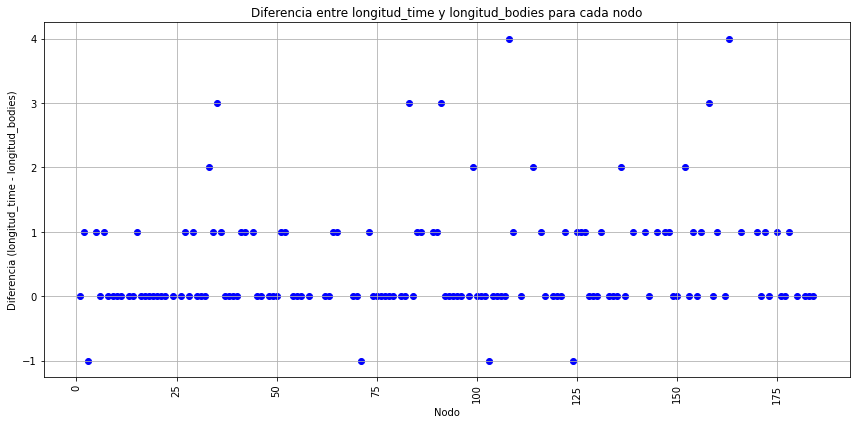

In [14]:
plt.figure(figsize=(12, 6))
plt.scatter(nodes_results['nodo'], nodes_results['diferencia'], marker='o', linestyle='-', color='b')
plt.xlabel('Nodo')
plt.ylabel('Diferencia (longitud_time - longitud_bodies)')
plt.title('Diferencia entre longitud_time y longitud_bodies para cada nodo')
plt.grid(True)
plt.xticks(rotation=90)  # Rotar las etiquetas del eje-x si hay muchos nodos
plt.tight_layout()  # Ajustar el layout para que no se corten las etiquetas
plt.show()

In [56]:
import random

def fit_bodies(grafo):
    for node in grafo.nodes():
        times = grafo.nodes[node].get('time', [])
        bodies = grafo.nodes[node].get('bodies', [])
        
        if len(bodies) > len(times):
            bodies = random.sample(bodies, len(times))
        elif len(bodies) < len(times):
            bodies.extend(['bad'] * (len(times) - len(bodies)))
        
        grafo.nodes[node]['bodies'] = bodies

fit_bodies(grafo)

# verificamos longitudes 
nodes_results = [{'nodo': node, 
                  'longitud_time': len(grafo.nodes[node].get('time', [])), 
                  'longitud_bodies': len(grafo.nodes[node].get('bodies', [])), 
                  'iguales': len(grafo.nodes[node].get('time', [])) == len(grafo.nodes[node].get('bodies', []))}
                 for node in grafo.nodes()]

nodes_results = pd.DataFrame(nodes_results)
print(nodes_results)

     nodo  longitud_time  longitud_bodies  iguales
0      27              1                1     True
1     142              1                1     True
2      37             33               33     True
3     135             11               11     True
4     166             44               44     True
..    ...            ...              ...      ...
137   139              4                4     True
138   136             21               21     True
139   126             12               12     True
140   143              1                1     True
141    55              2                2     True

[142 rows x 4 columns]


In [33]:
# almacenamos los atributos de los nodos
nodos_atributos = []
for node, data in grafo.nodes(data=True):
    nodo_data = {
        'name': node,
        'mail': data.get('mail', ''),
        'name_employes': data.get('name_employes', ''),
        'note': data.get('note', ''),
        'bodies': json.dumps(data.get('bodies', []))
    }
    
    nodo_data['time'] = json.dumps(data.get('time', []))
    nodos_atributos.append(nodo_data)

df_nodos_atributos = pd.DataFrame(nodos_atributos)

# Guardamos
df_nodos_atributos.to_csv("nodos_atributos_completo_2.csv", index=False)

In [2]:
## LOAD

import pandas as pd
import networkx as nx
import json

# Cargar enlaces y nodos con atributos
enlaces = pd.read_csv("enlaces.csv")
nodos_atributos = pd.read_csv("nodos_atributos_completo_2.csv")

# Crear el grafo
grafo = nx.from_pandas_edgelist(enlaces, source='V1', target='V2')

# Asignar atributos a los nodos
for _, row in nodos_atributos.iterrows():
    grafo.nodes[row['name']]['mail'] = row['mail']
    grafo.nodes[row['name']]['name_employes'] = row['name_employes']
    grafo.nodes[row['name']]['note'] = row['note']
    grafo.nodes[row['name']]['time'] = json.loads(row['time'])  # Convertir el JSON a una lista
    grafo.nodes[row['name']]['bodies'] = json.loads(row['bodies'])  # Convertir el JSON a una lista

for i, nodo in enumerate(grafo.nodes(data=True)):
    if i >= 3:
        break
    print(nodo)

(27, {'mail': 'darron.giron', 'name_employes': 'Daron Giron', 'note': 'Employee', 'time': ['2001-04-30 13:35:00'], 'bodies': ['---------------------- Forwarded by Darron C Giron/HOU/ECT on 04/30/2001 \n04:35 PM ---------------------------\n\n\n"hollyw" <hollyw@email.msn.com> on 04/30/2001 03:31:28 PM\nTo: "Raymond Paterson" <ray_paterson@hotmail.com>, "Pete Weidler" \n<Peter.E.Weidler@enron.com>, "Nicol, Gary" <nicolg@bp.com>, "Miguel \nOttaviano" <mottaviano@gastomarket.com>, "Moe" <MoeHeadberg@Hotmail.com>, \n"KRISTI GIRON" <KRISTI.GIRON@cfisd.net>, "Jim Miller" <jraggie1@pdq.net>, \n"John Schmitz" <john.schmitz@rlxtechnologies.com>, "Gregor, Lynn C" \n<GregorLC@bp.com>, "Debbie Hall" <gmind@icsi.net>, "Matt Frazier" \n<fraz2girls@ev1.net>, "Diego Gotthelf" <dygotthelf@hotmail.com>, "Darron C \nGiron" <Darron.C.Giron@enron.com>, "Ben & Phyllis Tobias" \n<benandphyllistobias@compuserve.com>, "Barbara Denson" <bbdenson@pdq.net>, \n"Ben Schulein" <advantage@infovia.com.ar>\ncc:  \nSubje

# Network Analisys

#### vemos cuántos mensajes se enviaron *por día*

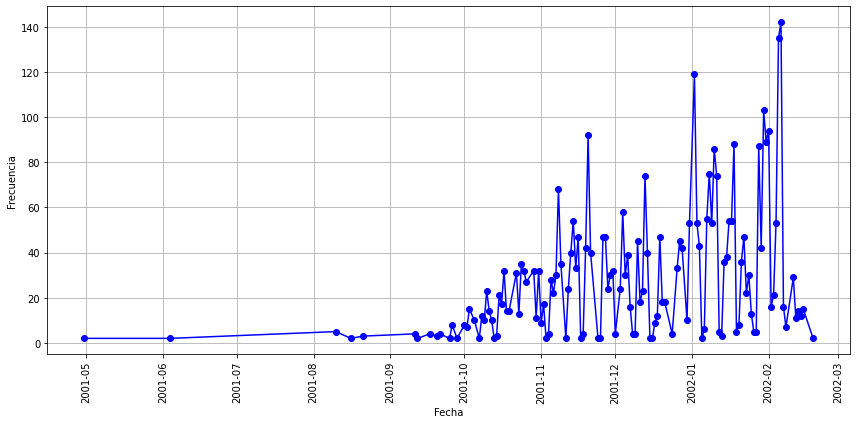

In [3]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# fechas de 'time' de todos los nodos
fechas = []
for node in grafo.nodes():
    fechas.extend([fecha.split()[0] for fecha in grafo.nodes[node].get('time', [])])

# frecuencia de cada fecha
frecuencia_fechas = Counter(fechas)

df_frecuencia = pd.DataFrame(frecuencia_fechas.items(), columns=['fecha', 'frecuencia'])
df_frecuencia['fecha'] = pd.to_datetime(df_frecuencia['fecha'])
df_frecuencia = df_frecuencia.sort_values('fecha')

# Plot
plt.figure(figsize=(12, 6))
plt.plot(df_frecuencia['fecha'], df_frecuencia['frecuencia'], marker='o', linestyle='-', color='b')
plt.xlabel('Fecha')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.xticks(rotation=90)  
plt.tight_layout()  # Ajustar el layout para que no se corten las etiquetas
plt.show()

#### vemos cuál fue la cantidad más grande de días consecutivos con frecuencia no nula

In [4]:
import numpy as np

# serie de fechas completas en el rango de fechas de df_frecuencia
fecha_inicio = df_frecuencia['fecha'].min()
fecha_fin = df_frecuencia['fecha'].max()
fechas_completas = pd.date_range(start=fecha_inicio, end=fecha_fin)

# unimos con df_frecuencia
df_completo = pd.DataFrame({'fecha': fechas_completas})
df_completo = df_completo.merge(df_frecuencia, on='fecha', how='left').fillna(0)

# creamos columna booleana para distinguir frecuencias nulas
df_completo['frecuencia_no_nula'] = df_completo['frecuencia'] > 0

# calculamos la cantidad más grande de días consecutivos con frecuencia no nula
max_dias_consecutivos = df_completo['frecuencia_no_nula'].astype(int).groupby((df_completo['frecuencia_no_nula'] != df_completo['frecuencia_no_nula'].shift()).cumsum()).cumsum().max()

print(f"La cantidad más grande de días consecutivos con frecuencia no nula es: {max_dias_consecutivos}")

# Creamos columna para identificar grupos de días consecutivos con frecuencia no nula
df_completo['grupo'] = (df_completo['frecuencia_no_nula'] != df_completo['frecuencia_no_nula'].shift()).cumsum()

grupos_no_nulos = df_completo[df_completo['frecuencia_no_nula']]
tamaño_grupos = grupos_no_nulos['grupo'].value_counts()
grupo_mas_grande = tamaño_grupos.idxmax()
dias_consecutivos_mas_largos = grupos_no_nulos[grupos_no_nulos['grupo'] == grupo_mas_grande]['fecha']

print(f":\n{dias_consecutivos_mas_largos}")

La cantidad más grande de días consecutivos con frecuencia no nula es: 38
:
247   2002-01-02
248   2002-01-03
249   2002-01-04
250   2002-01-05
251   2002-01-06
252   2002-01-07
253   2002-01-08
254   2002-01-09
255   2002-01-10
256   2002-01-11
257   2002-01-12
258   2002-01-13
259   2002-01-14
260   2002-01-15
261   2002-01-16
262   2002-01-17
263   2002-01-18
264   2002-01-19
265   2002-01-20
266   2002-01-21
267   2002-01-22
268   2002-01-23
269   2002-01-24
270   2002-01-25
271   2002-01-26
272   2002-01-27
273   2002-01-28
274   2002-01-29
275   2002-01-30
276   2002-01-31
277   2002-02-01
278   2002-02-02
279   2002-02-03
280   2002-02-04
281   2002-02-05
282   2002-02-06
283   2002-02-07
284   2002-02-08
Name: fecha, dtype: datetime64[ns]


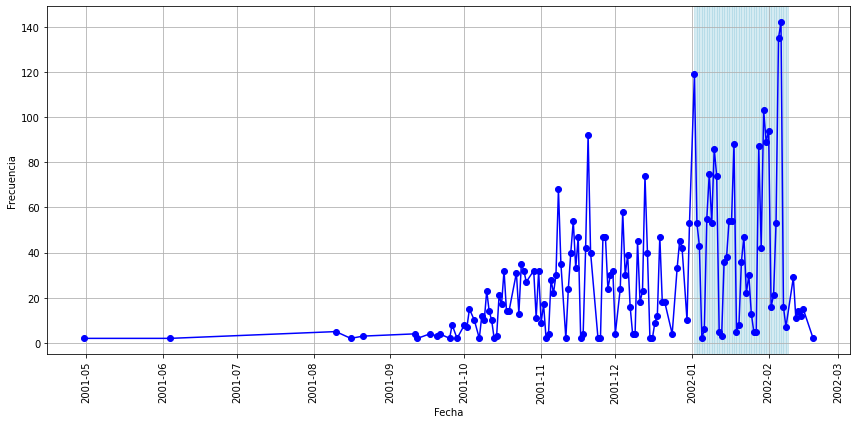

In [5]:
plt.figure(figsize=(12, 6))
plt.plot(df_frecuencia['fecha'], df_frecuencia['frecuencia'], marker='o', linestyle='-', color='b')

for fecha in dias_consecutivos_mas_largos:
    plt.axvspan(fecha, fecha + pd.Timedelta(days=1), color='lightblue', alpha=0.5)

plt.xlabel('Fecha')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.xticks(rotation=90)  # Rotar las etiquetas del eje-x si hay muchas fechas
plt.tight_layout()  # Ajustar el layout para que no se corten las etiquetas
plt.show()

### Cargamos paquetes y definimos función para lematizar

In [6]:
import networkx as nx
import pandas as pd
import re
import string
import stanza
import liwc
from collections import Counter
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Inicializar el pipeline de Stanza
stanza.download('es')
nlp_es = stanza.Pipeline(lang='es', processors='tokenize,mwt,lemma')

# Función para lematizar el texto
def lemmatizer_es(text):
    doc = nlp_es(text)
    lemmatized_text = ' '.join([word.lemma for sentence in doc.sentences for word in sentence.words])
    return lemmatized_text

2024-07-25 11:19:42 INFO: Downloaded file to /uufs/chpc.utah.edu/common/home/u6060602/stanza_resources/resources.json
2024-07-25 11:19:42 INFO: Downloading default packages for language: es (Spanish) ...
2024-07-25 11:19:44 INFO: File exists: /uufs/chpc.utah.edu/common/home/u6060602/stanza_resources/es/default.zip
2024-07-25 11:19:50 INFO: Finished downloading models and saved to /uufs/chpc.utah.edu/common/home/u6060602/stanza_resources
2024-07-25 11:19:50 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


2024-07-25 11:19:50 INFO: Downloaded file to /uufs/chpc.utah.edu/common/home/u6060602/stanza_resources/resources.json
2024-07-25 11:19:50 INFO: Loading these models for language: es (Spanish):
| Processor | Package           |
---------------------------------
| tokenize  | combined          |
| mwt       | combined          |
| lemma     | combined_nocharlm |

2024-07-25 11:19:50 INFO: Using device: cpu
2024-07-25 11:19:50 INFO: Loading: tokenize
/uufs/chpc.utah.edu/common/home/u6060602/.local/lib/python3.10/site-packages/torch/cuda/__init__.py:619: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2024-07-25 11:19:52 INFO: Loading: mwt
2024-07-25 11:19:52 INFO: Loading: lemma
2024-07-25 11:19:52 INFO: Done loading processors!


In [38]:
text = "The quick brown foxes are jumping over the lazy dogs."
lemmatized_text = lemmatizer_es(text)
print(lemmatized_text)

the quick brown foxe are jumping over the lazy dogs .


In [8]:
# Inicializar el pipeline de Stanza
stanza.download('en')
nlp = stanza.Pipeline(lang='en', processors='tokenize,mwt,lemma')

# Función para lematizar el texto
def lemmatizer(text):
    doc = nlp(text)
    lemmatized_text = ' '.join([word.lemma for sentence in doc.sentences for word in sentence.words])
    return lemmatized_text

2024-07-25 11:22:00 INFO: Downloaded file to /uufs/chpc.utah.edu/common/home/u6060602/stanza_resources/resources.json
2024-07-25 11:22:00 INFO: Downloading default packages for language: en (English) ...
2024-07-25 11:22:02 INFO: File exists: /uufs/chpc.utah.edu/common/home/u6060602/stanza_resources/en/default.zip
2024-07-25 11:22:07 INFO: Finished downloading models and saved to /uufs/chpc.utah.edu/common/home/u6060602/stanza_resources
2024-07-25 11:22:07 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


2024-07-25 11:22:07 INFO: Downloaded file to /uufs/chpc.utah.edu/common/home/u6060602/stanza_resources/resources.json
2024-07-25 11:22:07 INFO: Loading these models for language: en (English):
| Processor | Package           |
---------------------------------
| tokenize  | combined          |
| mwt       | combined          |
| lemma     | combined_nocharlm |

2024-07-25 11:22:07 INFO: Using device: cpu
2024-07-25 11:22:07 INFO: Loading: tokenize
2024-07-25 11:22:07 INFO: Loading: mwt
2024-07-25 11:22:07 INFO: Loading: lemma
2024-07-25 11:22:07 INFO: Done loading processors!


In [39]:
text = "The quick brown foxes are jumping over the lazy dogs."
lemmatized_text = lemmatizer(text)
print(lemmatized_text)

the quick brown fox be jump over the lazy dog .


#### Preprocesamos los textos de la red para aplicar conteo de palabras de Moral Foundations

In [10]:
grafo.nodes[95]['bodies'][20]

'More correspondence from WWICORP.  \n \nLiz\n-----Original Message-----\nFrom: WWICORP [mailto:wwicorp@br.inter.net]\nSent: Friday, January 18, 2002 1:48 PM\nTo: Taylor, Liz\nSubject: A solution for the Enron global financial problem.\n\n\nENRON CORP.\n\nMr. Greg Walley, President   \n\nMr. Kenneth Lay, CEO\n\nDear Sirs\n\nWWI INVESTMENT CORP. development programs foresees the building of prototypes and massive production of Spin-Quantum Energy generators, reactors and motors in Europe. This is a non polluting energy, available in quantities without limits. \n\nOur target is the serial manufacturing of generators, reactors and motors all over the world to replace motors and hydroelectric, thermoelectric and atomic generators presently in use. The energy cost will be reduced to less than 1/10 of the current price and  we are sure the Spin-Quantum Energy will make gasoline, diesel and alcohol obsolete. \n\nWWI INVESTMENT CORP is the owner of the rights to manufacture the products. Takin

In [11]:
texto = grafo.nodes[95]['bodies'][20]
lemmatizer(texto)

'more correspondence from wwicorp . Liz ----- original message ----- from : wwicorp [ mailto:wwicorp@br.inter.net ] send : Friday , January 18 , 2002 1:48 p.m. to : Taylor , Liz subject : a solution for the Enron global financial problem . enron corp . Mr. greg walley , President Mr. Kenneth Lay , ceo dear sir wwi investment corp . development program foresee the building of prototype and massive production of spin- quantum Energy generator , reactor and motor in Europe . this be a non pollute energy , available in quantity without limit . our target be the serial manufacturing of generator , reactor and motor all over the world to replace motor and hydroelectric , thermoelectric and atomic generator presently in use . the energy cost will be reduce to less than 1/10 of the current price and we be sure the spin - quantum Energy will make gasoline , diesel and alcohol obsolete . wwi investment corp be the owner of the right to manufacture the product . take into account the problem enro

In [12]:
texto = texto.lower()
#texto
texto = re.sub("[0-9]", '', texto)
#texto
texto = texto.translate(str.maketrans('', '', string.punctuation))
#texto
texto = texto.strip()
#texto
texto = texto.replace('\n', ' ')
#texto
texto = lemmatizer(texto)
texto

'more correspondence from wwicorp lizh original message from wwicorp mailtowwicorpbrinternet send Friday january p.m. to taylor lizh subject a solution for the enron global financial problem enron corp mr greg walley president mr kenneth lay ceo dear sir wwi investment corp development program foresee the building of prototype and massive production of spinquantum energy generator reactor and motor in europe this be a non pollute energy available in quantity without limit our target be the serial manufacturing of generator reactor and motor all over the world to replace motor and hydroelectric thermoelectric and atomic generator presently in use the energy cost will be reduce to less than of the current price and we be sure the spinquantum energy will make gasoline diesel and alcohol obsolete wwi investment corp be the owner of the right to manufacture the product take into account the problem enron be face now and our intention of accelerate wwi corp development program we consider th

In [13]:
texto = texto.lower()
#texto
texto = re.sub("[0-9]", '', texto)
#texto
texto = texto.translate(str.maketrans('', '', string.punctuation))
#texto
texto = texto.strip()
#texto
texto = texto.replace('\n', ' ')
#texto
texto = lemmatizer_es(texto)
texto

'more correspondence from wwicorp lizh original message from wwicorp mailtowwicorpbrinternet send friday january pm to taylor lizh subject a solutión for the enron global financial problem enron corp mr greg walley president mr kenneth lay ceo dear sir wwi investment corp development program foresee the building of prototype and massive productión of spinquantum energy generator reactor and motor in europe thi be a non pollute energy available in quantity without limit our target be the serial manufacturing of generator reactor and motor a ell over the world to replace motor and hydroelectric thermoelectric and atomic generator presently in usar the energy cost will be reducir to less than of the current price and we be sure the spinquantum energy will make gasoline diesel and alcohol obsolete wwi investment corp be the owner of the right to manufacture the product take into account the problem enron be face now and our intentión of accelerate wwi corp development program we consider t

#### claras DIFERENCIAS: "solutión", "productión", "intentión", "billión", "corporatión", "presently in usar". Veamos si hay diferencias en los resultados.

In [14]:
word_tokenize(texto)[10:20]

['send',
 'friday',
 'january',
 'pm',
 'to',
 'taylor',
 'lizh',
 'subject',
 'a',
 'solutión']

In [15]:
list_datatime_in_dias_cons = []
for node in grafo.nodes():
    times = grafo.nodes[node].get('time', [])
    bodies = grafo.nodes[node].get('bodies', [])
    for i, fecha in enumerate(times):
        boolan_value = pd.to_datetime(fecha.split()[0]) in dias_consecutivos_mas_largos.values
        list_datatime_in_dias_cons.append(boolan_value)
        
list_datatime_in_dias_cons[20:30]

[False, False, False, False, False, False, True, True, True, True]

In [16]:
# Preprocesar los textos de los mensajes relevantes
mensajes_relevantes = []
for node in grafo.nodes():
    times = grafo.nodes[node].get('time', [])
    bodies = grafo.nodes[node].get('bodies', [])
    for i, fecha in enumerate(times):
        if pd.to_datetime(fecha.split()[0]) in dias_consecutivos_mas_largos.values:
            mensaje = bodies[i].lower()
            mensaje = re.sub("[0-9]", '', mensaje)
            mensaje = mensaje.translate(str.maketrans('', '', string.punctuation))
            mensaje = mensaje.strip()
            mensaje = mensaje.replace('\n', ' ')
            mensaje = lemmatizer(mensaje)
            mensajes_relevantes.append({'nodo': node, 'fecha': fecha.split()[0], 'mensaje': mensaje})

df_mensajes = pd.DataFrame(mensajes_relevantes)

In [17]:
# Preprocesar los textos de los mensajes relevantes (LEMATIZER_ES)
mensajes_relevantes_es = []
for node in grafo.nodes():
    times = grafo.nodes[node].get('time', [])
    bodies = grafo.nodes[node].get('bodies', [])
    for i, fecha in enumerate(times):
        if pd.to_datetime(fecha.split()[0]) in dias_consecutivos_mas_largos.values:
            mensaje = bodies[i].lower()
            mensaje = re.sub("[0-9]", '', mensaje)
            mensaje = mensaje.translate(str.maketrans('', '', string.punctuation))
            mensaje = mensaje.strip()
            mensaje = mensaje.replace('\n', ' ')
            mensaje = lemmatizer_es(mensaje)
            mensajes_relevantes_es.append({'nodo': node, 'fecha': fecha.split()[0], 'mensaje': mensaje})

df_mensajes_es = pd.DataFrame(mensajes_relevantes_es)

In [40]:
df_mensajes_es == df_mensajes

nodo  fecha  mensaje
0     True   True    False
1     True   True    False
2     True   True    False
3     True   True    False
4     True   True    False
...    ...    ...      ...
1815  True   True    False
1816  True   True    False
1817  True   True    False
1818  True   True    False
1819  True   True    False

[1820 rows x 3 columns]

#### aplicamos conteo de palabras, basandonos en el diccionario moral_foundations_dictionary_original.dic

In [18]:
# Abrimos el archivo original en modo lectura
with open('moral_foundations_dictionary_original.dic', 'r', encoding='latin-1') as file:
    lines = file.readlines()

# Eliminamos los espacios entre las letras y las categorías
cleaned_lines = []
for line in lines:
    if line.strip():
        parts = line.split()
        cleaned_line = '\t'.join(parts) + '\n'
        cleaned_lines.append(cleaned_line)

# Guardamos en un archivo temporal con el nombre deseado
with open('temp_moral_foundations_dictionary_original.dic', 'w', encoding='utf-8') as temp_file:
    temp_file.writelines(cleaned_lines)

# cargamos archivo temporal con la función liwc.load_token_parser
parse, category_names = liwc.load_token_parser('temp_moral_foundations_dictionary_original.dic')

In [19]:
category_names

['HarmVirtue',
 'HarmVice',
 'FairnessVirtue',
 'FairnessVice',
 'IngroupVirtue',
 'IngroupVice',
 'AuthorityVirtue',
 'AuthorityVice',
 'PurityVirtue',
 'PurityVice',
 'MoralityGeneral']

In [20]:
# aplicamos conteo de palabras del diccionario 'moral foundations'

df_mdf = pd.DataFrame()
for ix in range(df_mensajes.shape[0]):
    texto = df_mensajes.mensaje[ix]
    tokens = word_tokenize(texto)
    tcounts1 = Counter(category for token in tokens for category in parse(token))
    df_counts = pd.DataFrame.from_dict([tcounts1]).reset_index()
    df_counts['nodo'] = df_mensajes.nodo[ix]
    df_counts['fecha'] = df_mensajes.fecha[ix]
    df_mdf = pd.concat([df_mdf, df_counts], axis=0, ignore_index=True)

In [45]:
df_mdf[0:5]

index  nodo      fecha  IngroupVice  IngroupVirtue  AuthorityVirtue  \
1210      0    91 2002-01-02          NaN            NaN              NaN   
896       0    95 2002-01-02          NaN            NaN              NaN   
1444      0   148 2002-01-02          NaN            NaN              NaN   
1441      0   148 2002-01-02          NaN            NaN              NaN   
473       0    35 2002-01-02          NaN            6.0              1.0   

      MoralityGeneral  HarmVice  PurityVirtue  PurityVice  HarmVirtue  \
1210              NaN       NaN           NaN         NaN         NaN   
896               NaN       NaN           NaN         NaN         NaN   
1444              NaN       NaN           NaN         NaN         NaN   
1441              NaN       NaN           NaN         NaN         NaN   
473               5.0       2.0           NaN         NaN         NaN   

      FairnessVice  FairnessVirtue  AuthorityVice  
1210           NaN             NaN            NaN  
896            NaN             NaN            NaN  
1444           NaN             NaN            NaN  
1441           NaN             NaN            NaN  
473            NaN             NaN            NaN

In [62]:
df_mdf.loc[df_mdf_es['IngroupVice'] > 0]

index  nodo      fecha  IngroupVice  IngroupVirtue  AuthorityVirtue  \
250       0   108 2002-01-02          1.0            1.0              NaN   
574       0    10 2002-01-02          1.0            3.0              5.0   
919       0   154 2002-01-02          1.0            NaN              NaN   
918       0   154 2002-01-02          1.0            NaN              NaN   
132       0     2 2002-01-02          2.0            1.0              NaN   
...     ...   ...        ...          ...            ...              ...   
531       0    90 2002-02-06          1.0            NaN              1.0   
1569      0   160 2002-02-06          1.0            NaN              NaN   
1525      0   160 2002-02-06          1.0            NaN              2.0   
517       0     7 2002-02-06          1.0            1.0              NaN   
1571      0   160 2002-02-07          1.0            NaN              3.0   

      MoralityGeneral  HarmVice  PurityVirtue  PurityVice  HarmVirtue  \
250               2.0       NaN           NaN         NaN         NaN   
574               6.0       NaN           NaN         1.0         NaN   
919               NaN       1.0           NaN         NaN         2.0   
918               NaN       NaN           NaN         NaN         NaN   
132               1.0       NaN           NaN         NaN         NaN   
...               ...       ...           ...         ...         ...   
531               3.0       NaN           NaN         NaN         NaN   
1569              NaN       1.0           NaN         NaN         2.0   
1525              2.0       1.0           NaN         NaN         2.0   
517               NaN       NaN           NaN         NaN         NaN   
1571              NaN       1.0           NaN         NaN         1.0   

      FairnessVice  FairnessVirtue  AuthorityVice  
250            NaN             NaN            NaN  
574            2.0             NaN            1.0  
919            NaN             NaN            NaN  
918            NaN             NaN            NaN  
132            NaN             NaN            NaN  
...            ...             ...            ...  
531            1.0             4.0            NaN  
1569           NaN             NaN            NaN  
1525           NaN             NaN            NaN  
517            NaN             NaN            NaN  
1571           NaN             NaN            NaN  

[130 rows x 14 columns]

In [21]:
# aplicamos conteo de palabras del diccionario 'moral foundations'

df_mdf_es = pd.DataFrame()
for ix in range(df_mensajes_es.shape[0]):
    texto = df_mensajes_es.mensaje[ix]
    tokens = word_tokenize(texto)
    tcounts1 = Counter(category for token in tokens for category in parse(token))
    df_counts_es = pd.DataFrame.from_dict([tcounts1]).reset_index()
    df_counts_es['nodo'] = df_mensajes_es.nodo[ix]
    df_counts_es['fecha'] = df_mensajes_es.fecha[ix]
    df_mdf_es = pd.concat([df_mdf_es, df_counts_es], axis=0, ignore_index=True)

In [44]:
df_mdf_es[0:5]

index  nodo      fecha  IngroupVice  IngroupVirtue  AuthorityVirtue  \
1210      0    91 2002-01-02          NaN            NaN              NaN   
896       0    95 2002-01-02          NaN            NaN              NaN   
1444      0   148 2002-01-02          NaN            NaN              NaN   
1441      0   148 2002-01-02          NaN            NaN              NaN   
473       0    35 2002-01-02          NaN            6.0              1.0   

      MoralityGeneral  HarmVice  PurityVirtue  PurityVice  HarmVirtue  \
1210              NaN       NaN           NaN         NaN         NaN   
896               NaN       NaN           NaN         NaN         NaN   
1444              NaN       NaN           NaN         NaN         NaN   
1441              NaN       NaN           NaN         NaN         NaN   
473               2.0       1.0           NaN         NaN         NaN   

      FairnessVice  FairnessVirtue  AuthorityVice  
1210           NaN             NaN            NaN  
896            NaN             NaN            NaN  
1444           NaN             NaN            NaN  
1441           NaN             NaN            NaN  
473            NaN             NaN            NaN

In [63]:
df_mdf_es.loc[df_mdf_es['IngroupVice'] > 0]

index  nodo      fecha  IngroupVice  IngroupVirtue  AuthorityVirtue  \
250       0   108 2002-01-02          1.0            NaN              NaN   
574       0    10 2002-01-02          1.0            3.0              5.0   
919       0   154 2002-01-02          1.0            NaN              NaN   
918       0   154 2002-01-02          1.0            NaN              NaN   
132       0     2 2002-01-02          2.0            1.0              NaN   
...     ...   ...        ...          ...            ...              ...   
531       0    90 2002-02-06          1.0            NaN              1.0   
1569      0   160 2002-02-06          1.0            NaN              NaN   
1525      0   160 2002-02-06          1.0            NaN              2.0   
517       0     7 2002-02-06          1.0            1.0              NaN   
1571      0   160 2002-02-07          1.0            NaN              NaN   

      MoralityGeneral  HarmVice  PurityVirtue  PurityVice  HarmVirtue  \
250               1.0       NaN           NaN         NaN         NaN   
574               6.0       NaN           NaN         1.0         NaN   
919               NaN       NaN           NaN         NaN         2.0   
918               NaN       NaN           NaN         NaN         NaN   
132               NaN       NaN           NaN         NaN         NaN   
...               ...       ...           ...         ...         ...   
531               3.0       NaN           NaN         NaN         NaN   
1569              NaN       NaN           NaN         NaN         2.0   
1525              2.0       NaN           NaN         NaN         2.0   
517               NaN       NaN           NaN         NaN         NaN   
1571              NaN       1.0           NaN         NaN         1.0   

      FairnessVice  FairnessVirtue  AuthorityVice  
250            NaN             NaN            NaN  
574            2.0             NaN            1.0  
919            NaN             NaN            NaN  
918            NaN             NaN            NaN  
132            NaN             NaN            NaN  
...            ...             ...            ...  
531            1.0             4.0            NaN  
1569           NaN             NaN            NaN  
1525           NaN             NaN            NaN  
517            NaN             NaN            NaN  
1571           NaN             NaN            NaN  

[130 rows x 14 columns]

### Si comparamos los valores de las otras columnas, podemos ver que efectivamente entregan resultados distintos

In [22]:
# Guardamos 

import pickle

# Asumiendo que ya tienes los objetos `grafo`, `df_mdf`, y `dias_consecutivos_mas_largos` creados

# Guardar el grafo
with open('grafo.pkl', 'wb') as f:
    pickle.dump(grafo, f)

# Guardar df_mdf
df_mdf.to_pickle('df_mdf.pkl')
df_mdf_es.to_pickle('df_mdf_es.pkl')

# Guardar dias_consecutivos_mas_largos
dias_consecutivos_mas_largos.to_pickle('dias_consecutivos_mas_largos.pkl')

In [23]:
# LOAD

import networkx as nx
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Cargar el grafo
with open('grafo.pkl', 'rb') as f:
    grafo = pickle.load(f)

# Cargar df_mdf
df_mdf = pd.read_pickle('df_mdf.pkl')
df_mdf_es = pd.read_pickle('df_mdf_es.pkl')

# Cargar dias_consecutivos_mas_largos
dias_consecutivos_mas_largos = pd.read_pickle('dias_consecutivos_mas_largos.pkl')

## Vemos red de contagio (valores no nulos de 'IngroupVice').

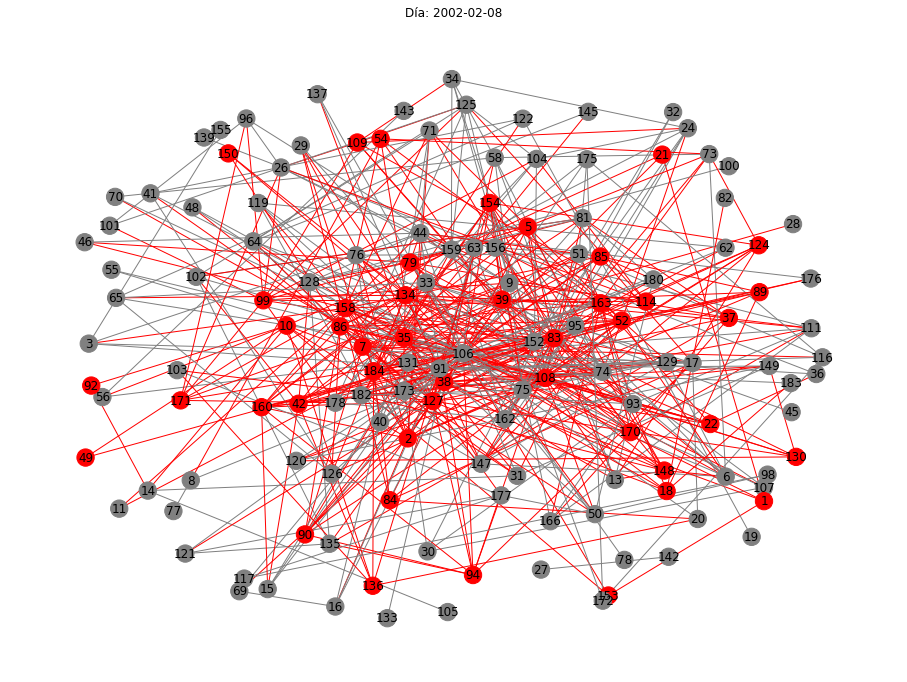

In [24]:
df_mdf['fecha'] = pd.to_datetime(df_mdf['fecha'])
df_mdf = df_mdf.sort_values('fecha')

# fijar layout
pos = nx.spring_layout(grafo, k=1)  # Ajusta el valor de k para aumentar la distancia entre nodos

fig, ax = plt.subplots(figsize=(16, 12))

# Crear un conjunto para mantener los nodos infectados
nodos_infectados_totales = set()

def update(num):
    ax.clear()
    fecha_actual = dias_consecutivos_mas_largos.iloc[num]
    nodos_infectados_dia = df_mdf[df_mdf['fecha'] == fecha_actual].groupby('nodo')['IngroupVice'].mean()
    nodos_infectados_dia = nodos_infectados_dia[nodos_infectados_dia >= 1].index
    nodos_infectados_totales.update(nodos_infectados_dia)  # Actualizar el conjunto de nodos infectados
    colores = ['red' if node in nodos_infectados_totales else 'gray' for node in grafo.nodes()]
    
    # Pintar los enlaces de todos los vecinos de un nodo infectado
    edge_colors = []
    for edge in grafo.edges():
        if edge[0] in nodos_infectados_totales or edge[1] in nodos_infectados_totales:
            edge_colors.append('red')
        else:
            edge_colors.append('gray')
    
    nx.draw(grafo, pos, ax=ax, node_color=colores, edge_color=edge_colors, with_labels=True)
    ax.set_title(f'Día: {fecha_actual.date()}')

ani = animation.FuncAnimation(fig, update, frames=len(dias_consecutivos_mas_largos), interval=500, repeat=False)  # interval=500 para medio segundo por frame
ani.save('contagio.gif', writer='imagemagick')

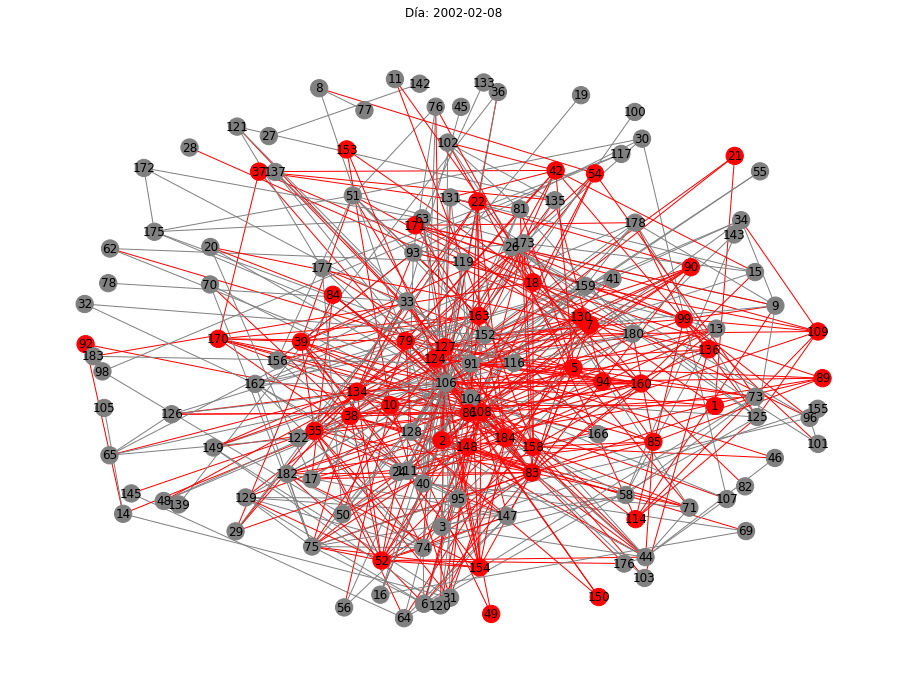

In [25]:
df_mdf_es['fecha'] = pd.to_datetime(df_mdf_es['fecha'])
df_mdf_es = df_mdf_es.sort_values('fecha')

# fijar layout
pos = nx.spring_layout(grafo, k=1)  # Ajusta el valor de k para aumentar la distancia entre nodos

fig, ax = plt.subplots(figsize=(16, 12))

# Crear un conjunto para mantener los nodos infectados
nodos_infectados_totales_es = set()

def update(num):
    ax.clear()
    fecha_actual = dias_consecutivos_mas_largos.iloc[num]
    nodos_infectados_dia = df_mdf_es[df_mdf_es['fecha'] == fecha_actual].groupby('nodo')['IngroupVice'].mean()
    nodos_infectados_dia = nodos_infectados_dia[nodos_infectados_dia >= 1].index
    nodos_infectados_totales_es.update(nodos_infectados_dia)  # Actualizar el conjunto de nodos infectados
    colores = ['red' if node in nodos_infectados_totales_es else 'gray' for node in grafo.nodes()]
    
    # Pintar los enlaces de todos los vecinos de un nodo infectado
    edge_colors = []
    for edge in grafo.edges():
        if edge[0] in nodos_infectados_totales_es or edge[1] in nodos_infectados_totales_es:
            edge_colors.append('red')
        else:
            edge_colors.append('gray')
    
    nx.draw(grafo, pos, ax=ax, node_color=colores, edge_color=edge_colors, with_labels=True)
    ax.set_title(f'Día: {fecha_actual.date()}')

ani = animation.FuncAnimation(fig, update, frames=len(dias_consecutivos_mas_largos), interval=500, repeat=False)  # interval=500 para medio segundo por frame
ani.save('contagio.gif', writer='imagemagick')

####  Vemos los thresholds para cada nodo

In [46]:
# Crear un conjunto para mantener los nodos infectados
nodos_infectados_totales = set()
infeccion_por_vecinos = []

for num in range(len(dias_consecutivos_mas_largos)):
    fecha_actual = dias_consecutivos_mas_largos.iloc[num]
    nodos_infectados_dia = df_mdf[df_mdf['fecha'] == fecha_actual].groupby('nodo')['IngroupVice'].mean() # promedio de mensajes
    nodos_infectados_dia = nodos_infectados_dia[nodos_infectados_dia >= 1].index
    
    for nodo in nodos_infectados_dia:
        if nodo not in nodos_infectados_totales:
            # Verificar si el nodo tenía vecinos infectados en los días anteriores
            vecinos = set(grafo.neighbors(nodo))
            vecinos_infectados = vecinos.intersection(nodos_infectados_totales)
            infeccion_por_vecinos.append({'nodo': nodo, 'vecinos_infectados': len(vecinos_infectados)})
    
    nodos_infectados_totales.update(nodos_infectados_dia)  # Actualizar el conjunto de nodos infectados

# Convertir los resultados a un DataFrame
df_infeccion_por_vecinos = pd.DataFrame(infeccion_por_vecinos)

In [47]:
# Crear un conjunto para mantener los nodos infectados
nodos_infectados_totales_es = set()
infeccion_por_vecinos_es = []

for num in range(len(dias_consecutivos_mas_largos)):
    fecha_actual = dias_consecutivos_mas_largos.iloc[num]
    nodos_infectados_dia = df_mdf_es[df_mdf_es['fecha'] == fecha_actual].groupby('nodo')['IngroupVice'].mean() # promedio de mensajes
    nodos_infectados_dia = nodos_infectados_dia[nodos_infectados_dia >= 1].index
    
    for nodo in nodos_infectados_dia:
        if nodo not in nodos_infectados_totales_es:
            # Verificar si el nodo tenía vecinos infectados en los días anteriores
            vecinos = set(grafo.neighbors(nodo))
            vecinos_infectados = vecinos.intersection(nodos_infectados_totales_es)
            infeccion_por_vecinos_es.append({'nodo': nodo, 'vecinos_infectados': len(vecinos_infectados)})
    
    nodos_infectados_totales_es.update(nodos_infectados_dia)  # Actualizar el conjunto de nodos infectados

# Convertir los resultados a un DataFrame
df_infeccion_por_vecinos_es = pd.DataFrame(infeccion_por_vecinos_es)

df_infeccion_por_vecinos_es == df_infeccion_por_vecinos

nodo  vecinos_infectados
0   True                True
1   True                True
2   True                True
3   True                True
4   True                True
5   True                True
6   True                True
7   True                True
8   True                True
9   True                True
10  True                True
11  True                True
12  True                True
13  True                True
14  True                True
15  True                True
16  True                True
17  True                True
18  True                True
19  True                True
20  True                True
21  True                True
22  True                True
23  True                True
24  True                True
25  True                True
26  True                True
27  True                True
28  True                True
29  True                True
30  True                True
31  True                True
32  True                True
33  True                True
34  True                True
35  True                True
36  True                True
37  True                True
38  True                True
39  True                True
40  True                True
41  True                True
42  True                True
43  True                True

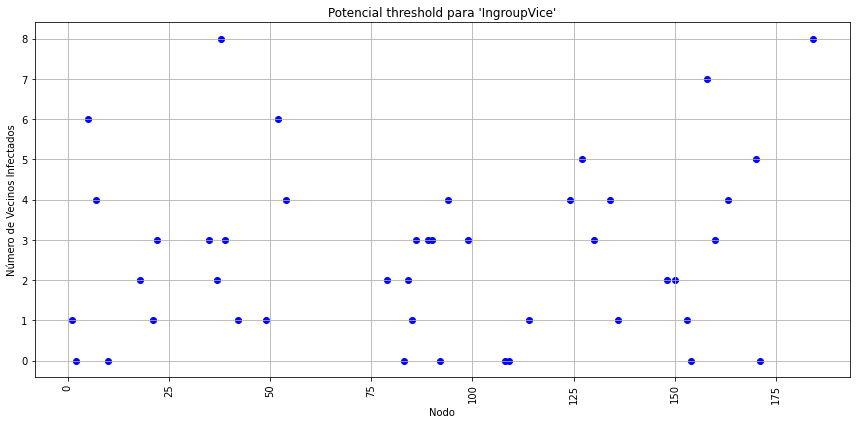

In [112]:
plt.figure(figsize=(12, 6))
plt.scatter(df_infeccion_por_vecinos['nodo'], df_infeccion_por_vecinos['vecinos_infectados'], marker='o', linestyle='-', color='b')
plt.xlabel('Nodo')
plt.ylabel('Número de Vecinos Infectados')
plt.title("Potencial threshold para 'IngroupVice'")
plt.grid(True)
plt.xticks(rotation=90)  # Rotar las etiquetas del eje-x si hay muchos nodos
plt.tight_layout()  # Ajustar el layout para que no se corten las etiquetas
plt.show()

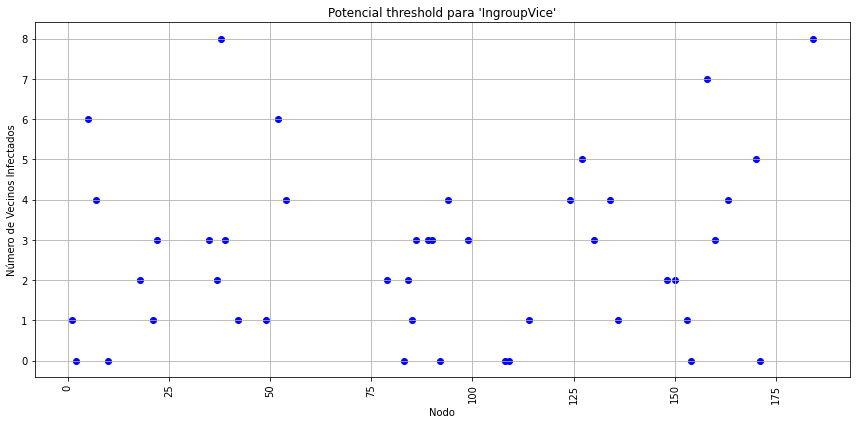

In [113]:
plt.figure(figsize=(12, 6))
plt.scatter(df_infeccion_por_vecinos['nodo'], df_infeccion_por_vecinos['vecinos_infectados'], marker='o', linestyle='-', color='b')
plt.xlabel('Nodo')
plt.ylabel('Número de Vecinos Infectados')
plt.title("Potencial threshold para 'IngroupVice'")
plt.grid(True)
plt.xticks(rotation=90)  # Rotar las etiquetas del eje-x si hay muchos nodos
plt.tight_layout()  # Ajustar el layout para que no se corten las etiquetas
plt.show()

## vemos la distribución de threshold

(ES)

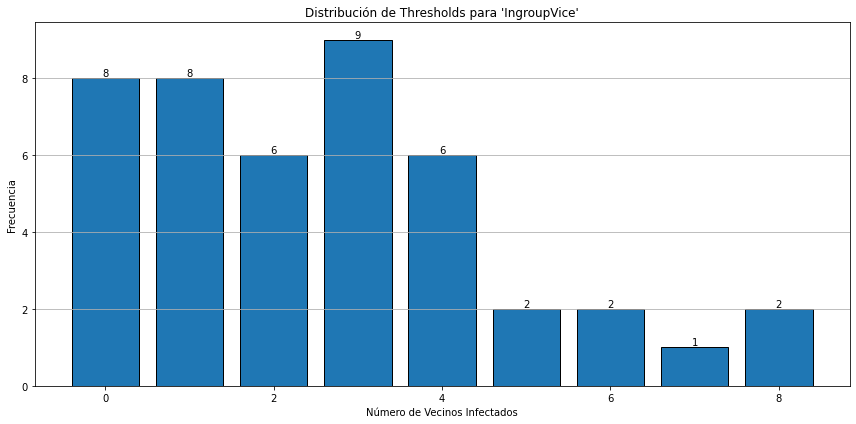

In [28]:
frecuencia_vecinos = df_infeccion_por_vecinos_es['vecinos_infectados'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
bars = plt.bar(frecuencia_vecinos.index, frecuencia_vecinos.values, edgecolor='black')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), va='bottom', ha='center')
plt.xlabel('Número de Vecinos Infectados')
plt.ylabel('Frecuencia')
plt.title("Distribución de Thresholds para 'IngroupVice'")
plt.grid(axis='y')
plt.tight_layout()  
plt.show()

(EN)

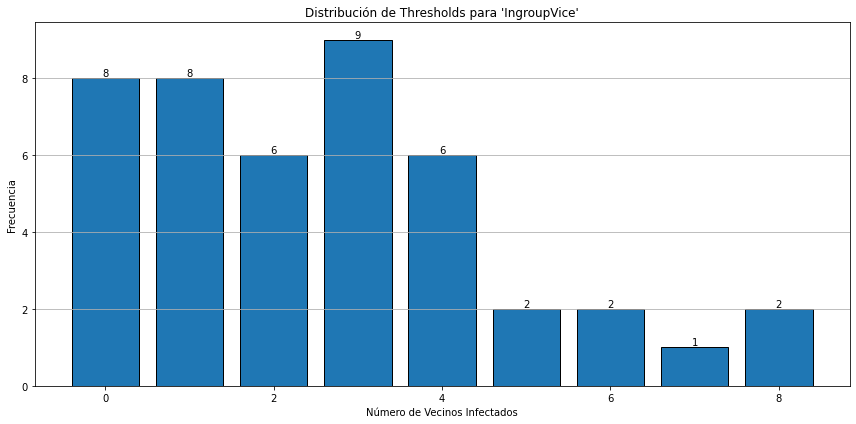

In [29]:
frecuencia_vecinos = df_infeccion_por_vecinos['vecinos_infectados'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
bars = plt.bar(frecuencia_vecinos.index, frecuencia_vecinos.values, edgecolor='black')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), va='bottom', ha='center')
plt.xlabel('Número de Vecinos Infectados')
plt.ylabel('Frecuencia')
plt.title("Distribución de Thresholds para 'IngroupVice'")
plt.grid(axis='y')
plt.tight_layout()  
plt.show()

(ES)

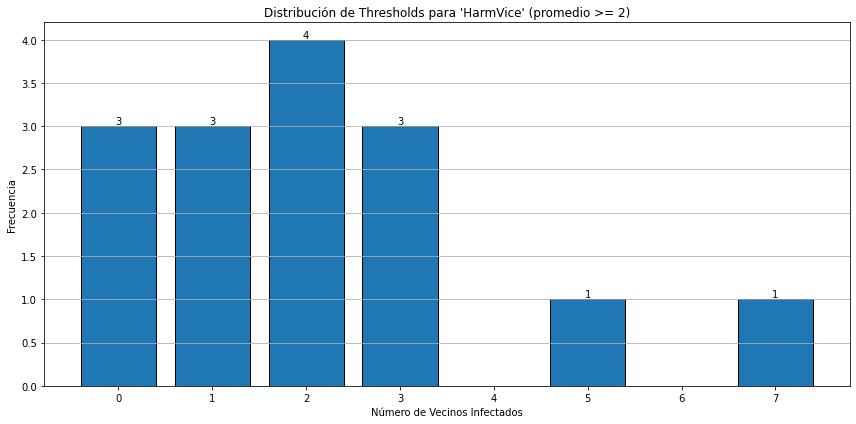

In [49]:
# Veamos qué pasa si dejo un threshold más restrictivo

# Crear un conjunto para mantener los nodos infectados
nodos_infectados_totales_es = set()
infeccion_por_vecinos_es = []

for num in range(len(dias_consecutivos_mas_largos)):
    fecha_actual = dias_consecutivos_mas_largos.iloc[num]
    nodos_infectados_dia = df_mdf[df_mdf['fecha'] == fecha_actual].groupby('nodo')['IngroupVice'].mean() # promedio de mensajes
    nodos_infectados_dia = nodos_infectados_dia[nodos_infectados_dia >= 2].index
    
    for nodo in nodos_infectados_dia:
        if nodo not in nodos_infectados_totales_es:
            # Verificar si el nodo tenía vecinos infectados en los días anteriores
            vecinos = set(grafo.neighbors(nodo))
            vecinos_infectados = vecinos.intersection(nodos_infectados_totales_es)
            infeccion_por_vecinos_es.append({'nodo': nodo, 'vecinos_infectados': len(vecinos_infectados)})
    
    nodos_infectados_totales_es.update(nodos_infectados_dia) 

# Convertir los resultados a un DataFrame
df_infeccion_por_vecinos_es = pd.DataFrame(infeccion_por_vecinos_es)

frecuencia_vecinos = df_infeccion_por_vecinos_es['vecinos_infectados'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
bars = plt.bar(frecuencia_vecinos.index, frecuencia_vecinos.values, edgecolor='black')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), va='bottom', ha='center')
plt.xlabel('Número de Vecinos Infectados')
plt.ylabel('Frecuencia')
plt.title("Distribución de Thresholds para 'HarmVice' (promedio >= 2)")
plt.grid(axis='y')
plt.tight_layout() 
plt.show()

(EN)

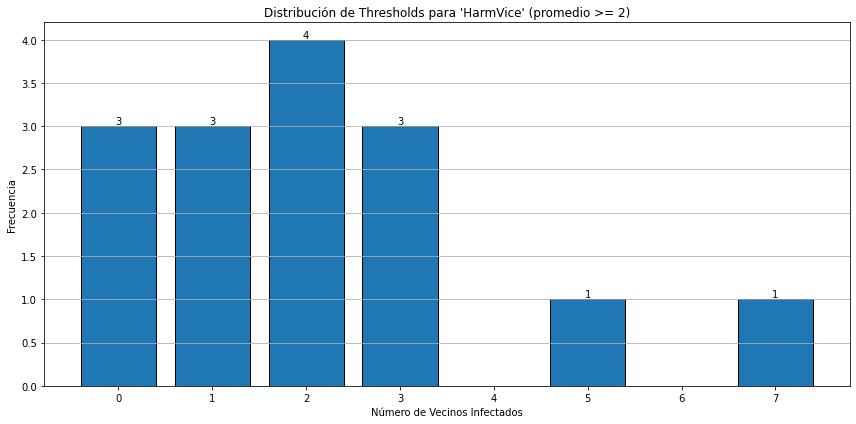

In [31]:
# Veamos qué pasa si dejo un threshold más restrictivo

# Crear un conjunto para mantener los nodos infectados
nodos_infectados_totales = set()
infeccion_por_vecinos = []

for num in range(len(dias_consecutivos_mas_largos)):
    fecha_actual = dias_consecutivos_mas_largos.iloc[num]
    nodos_infectados_dia = df_mdf[df_mdf['fecha'] == fecha_actual].groupby('nodo')['IngroupVice'].mean() # promedio de mensajes
    nodos_infectados_dia = nodos_infectados_dia[nodos_infectados_dia >= 2].index
    
    for nodo in nodos_infectados_dia:
        if nodo not in nodos_infectados_totales:
            # Verificar si el nodo tenía vecinos infectados en los días anteriores
            vecinos = set(grafo.neighbors(nodo))
            vecinos_infectados = vecinos.intersection(nodos_infectados_totales)
            infeccion_por_vecinos.append({'nodo': nodo, 'vecinos_infectados': len(vecinos_infectados)})
    
    nodos_infectados_totales.update(nodos_infectados_dia) 

# Convertir los resultados a un DataFrame
df_infeccion_por_vecinos = pd.DataFrame(infeccion_por_vecinos)

frecuencia_vecinos = df_infeccion_por_vecinos['vecinos_infectados'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
bars = plt.bar(frecuencia_vecinos.index, frecuencia_vecinos.values, edgecolor='black')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), va='bottom', ha='center')
plt.xlabel('Número de Vecinos Infectados')
plt.ylabel('Frecuencia')
plt.title("Distribución de Thresholds para 'HarmVice' (promedio >= 2)")
plt.grid(axis='y')
plt.tight_layout() 
plt.show()

#### Cantidad problemática de N° vecinos infectados = 0. ## Probemos otros. 
## HarmVice: preocupación por el bienestar de los demás. 
## FairnessVirtue: equidad, justicia y trato igualitario.

(ES)

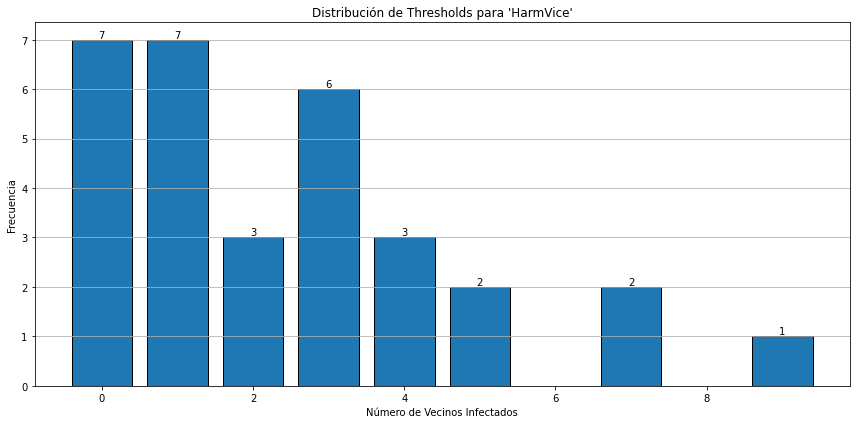

In [32]:
# Crear un conjunto para mantener los nodos infectados
nodos_infectados_totales_es = set()
infeccion_por_vecinos_es = []

for num in range(len(dias_consecutivos_mas_largos)):
    fecha_actual = dias_consecutivos_mas_largos.iloc[num]
    nodos_infectados_dia = df_mdf[df_mdf['fecha'] == fecha_actual].groupby('nodo')['HarmVice'].mean() # promedio de mensajes
    nodos_infectados_dia = nodos_infectados_dia[nodos_infectados_dia >= 1].index
    
    for nodo in nodos_infectados_dia:
        if nodo not in nodos_infectados_totales_es:
            # Verificar si el nodo tenía vecinos infectados en los días anteriores
            vecinos = set(grafo.neighbors(nodo))
            vecinos_infectados = vecinos.intersection(nodos_infectados_totales_es)
            infeccion_por_vecinos_es.append({'nodo': nodo, 'vecinos_infectados': len(vecinos_infectados)})
    
    nodos_infectados_totales_es.update(nodos_infectados_dia) 

# Convertir los resultados a un DataFrame
df_infeccion_por_vecinos_es = pd.DataFrame(infeccion_por_vecinos_es)

frecuencia_vecinos = df_infeccion_por_vecinos_es['vecinos_infectados'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
bars = plt.bar(frecuencia_vecinos.index, frecuencia_vecinos.values, edgecolor='black')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), va='bottom', ha='center')
plt.xlabel('Número de Vecinos Infectados')
plt.ylabel('Frecuencia')
plt.title("Distribución de Thresholds para 'HarmVice'")
plt.grid(axis='y')
plt.tight_layout() 
plt.show()

(EN)

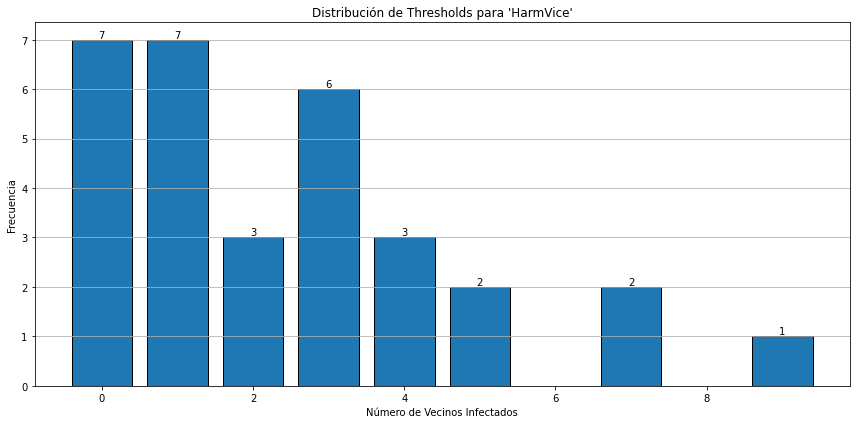

In [33]:
# Crear un conjunto para mantener los nodos infectados
nodos_infectados_totales = set()
infeccion_por_vecinos = []

for num in range(len(dias_consecutivos_mas_largos)):
    fecha_actual = dias_consecutivos_mas_largos.iloc[num]
    nodos_infectados_dia = df_mdf[df_mdf['fecha'] == fecha_actual].groupby('nodo')['HarmVice'].mean() # promedio de mensajes
    nodos_infectados_dia = nodos_infectados_dia[nodos_infectados_dia >= 1].index
    
    for nodo in nodos_infectados_dia:
        if nodo not in nodos_infectados_totales:
            # Verificar si el nodo tenía vecinos infectados en los días anteriores
            vecinos = set(grafo.neighbors(nodo))
            vecinos_infectados = vecinos.intersection(nodos_infectados_totales)
            infeccion_por_vecinos.append({'nodo': nodo, 'vecinos_infectados': len(vecinos_infectados)})
    
    nodos_infectados_totales.update(nodos_infectados_dia) 

# Convertir los resultados a un DataFrame
df_infeccion_por_vecinos = pd.DataFrame(infeccion_por_vecinos)

frecuencia_vecinos = df_infeccion_por_vecinos['vecinos_infectados'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
bars = plt.bar(frecuencia_vecinos.index, frecuencia_vecinos.values, edgecolor='black')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), va='bottom', ha='center')
plt.xlabel('Número de Vecinos Infectados')
plt.ylabel('Frecuencia')
plt.title("Distribución de Thresholds para 'HarmVice'")
plt.grid(axis='y')
plt.tight_layout() 
plt.show()

(ES)

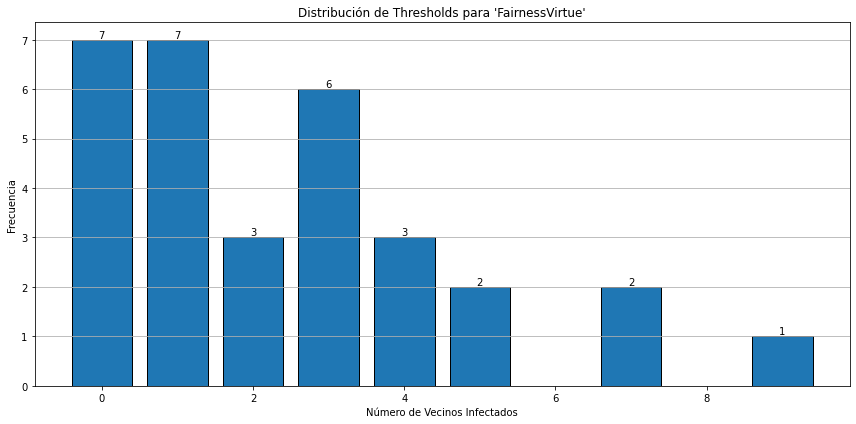

In [34]:
# Crear un conjunto para mantener los nodos infectados
nodos_infectados_totales_es = set()
infeccion_por_vecinos_es = []

for num in range(len(dias_consecutivos_mas_largos)):
    fecha_actual = dias_consecutivos_mas_largos.iloc[num]
    nodos_infectados_dia = df_mdf[df_mdf['fecha'] == fecha_actual].groupby('nodo')['FairnessVirtue'].mean() # promedio de mensajes
    nodos_infectados_dia = nodos_infectados_dia[nodos_infectados_dia >= 1].index
    
    for nodo in nodos_infectados_dia:
        if nodo not in nodos_infectados_totales_es:
            # Verificar si el nodo tenía vecinos infectados en los días anteriores
            vecinos = set(grafo.neighbors(nodo))
            vecinos_infectados = vecinos.intersection(nodos_infectados_totales_es)
            infeccion_por_vecinos_es.append({'nodo': nodo, 'vecinos_infectados': len(vecinos_infectados)})
    
    nodos_infectados_totales_es.update(nodos_infectados_dia) 

# Convertir los resultados a un DataFrame
df_infeccion_por_vecinos_es = pd.DataFrame(infeccion_por_vecinos_es)

frecuencia_vecinos = df_infeccion_por_vecinos['vecinos_infectados'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
bars = plt.bar(frecuencia_vecinos.index, frecuencia_vecinos.values, edgecolor='black')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), va='bottom', ha='center')
plt.xlabel('Número de Vecinos Infectados')
plt.ylabel('Frecuencia')
plt.title("Distribución de Thresholds para 'FairnessVirtue'")
plt.grid(axis='y')
plt.tight_layout() 
plt.show()

(EN)

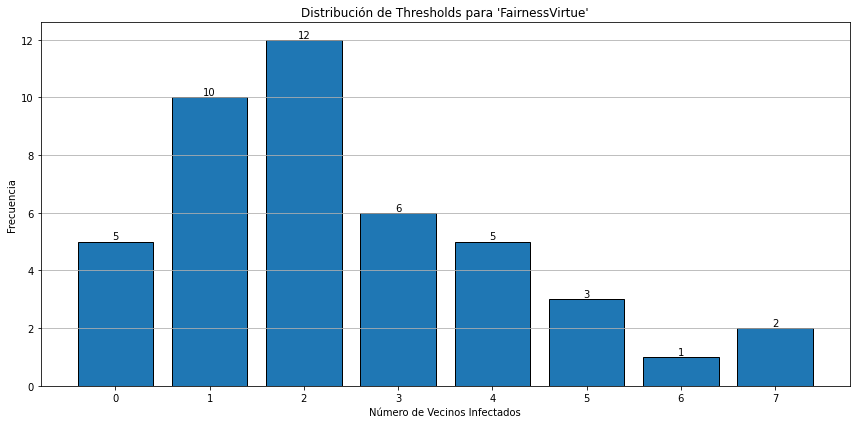

In [35]:
# Crear un conjunto para mantener los nodos infectados
nodos_infectados_totales = set()
infeccion_por_vecinos = []

for num in range(len(dias_consecutivos_mas_largos)):
    fecha_actual = dias_consecutivos_mas_largos.iloc[num]
    nodos_infectados_dia = df_mdf[df_mdf['fecha'] == fecha_actual].groupby('nodo')['FairnessVirtue'].mean() # promedio de mensajes
    nodos_infectados_dia = nodos_infectados_dia[nodos_infectados_dia >= 1].index
    
    for nodo in nodos_infectados_dia:
        if nodo not in nodos_infectados_totales:
            # Verificar si el nodo tenía vecinos infectados en los días anteriores
            vecinos = set(grafo.neighbors(nodo))
            vecinos_infectados = vecinos.intersection(nodos_infectados_totales)
            infeccion_por_vecinos.append({'nodo': nodo, 'vecinos_infectados': len(vecinos_infectados)})
    
    nodos_infectados_totales.update(nodos_infectados_dia) 

# Convertir los resultados a un DataFrame
df_infeccion_por_vecinos = pd.DataFrame(infeccion_por_vecinos)

frecuencia_vecinos = df_infeccion_por_vecinos['vecinos_infectados'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
bars = plt.bar(frecuencia_vecinos.index, frecuencia_vecinos.values, edgecolor='black')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), va='bottom', ha='center')
plt.xlabel('Número de Vecinos Infectados')
plt.ylabel('Frecuencia')
plt.title("Distribución de Thresholds para 'FairnessVirtue'")
plt.grid(axis='y')
plt.tight_layout() 
plt.show()

(ES)

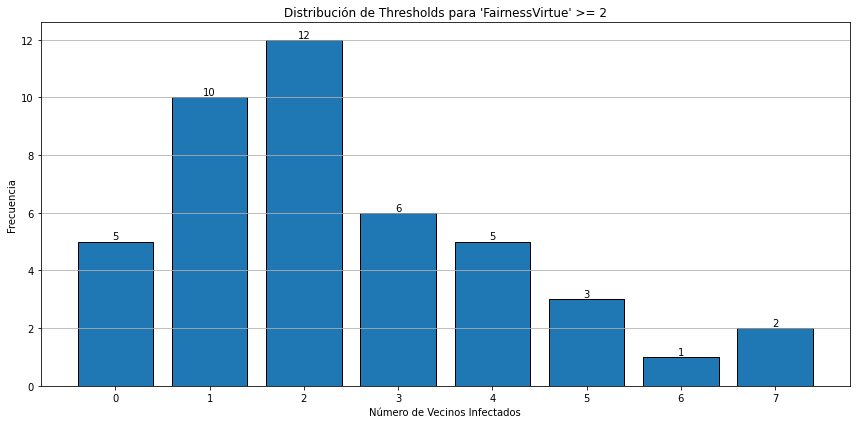

In [36]:
nodos_infectados_totales_es = set()
infeccion_por_vecinos_es = []

for num in range(len(dias_consecutivos_mas_largos)):
    fecha_actual = dias_consecutivos_mas_largos.iloc[num]
    nodos_infectados_dia = df_mdf[df_mdf['fecha'] == fecha_actual].groupby('nodo')['FairnessVirtue'].mean() # promedio de mensajes
    nodos_infectados_dia = nodos_infectados_dia[nodos_infectados_dia >= 2].index
    
    for nodo in nodos_infectados_dia:
        if nodo not in nodos_infectados_totales_es:
            # Verificar si el nodo tenía vecinos infectados en los días anteriores
            vecinos = set(grafo.neighbors(nodo))
            vecinos_infectados = vecinos.intersection(nodos_infectados_totales_es)
            infeccion_por_vecinos_es.append({'nodo': nodo, 'vecinos_infectados': len(vecinos_infectados)})
    
    nodos_infectados_totales_es.update(nodos_infectados_dia) 

# Convertir los resultados a un DataFrame
df_infeccion_por_vecinos_es = pd.DataFrame(infeccion_por_vecinos_es)

frecuencia_vecinos = df_infeccion_por_vecinos['vecinos_infectados'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
bars = plt.bar(frecuencia_vecinos.index, frecuencia_vecinos.values, edgecolor='black')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), va='bottom', ha='center')
plt.xlabel('Número de Vecinos Infectados')
plt.ylabel('Frecuencia')
plt.title("Distribución de Thresholds para 'FairnessVirtue' (promedio >= 2)")
plt.grid(axis='y')
plt.tight_layout() 
plt.show()

(EN)

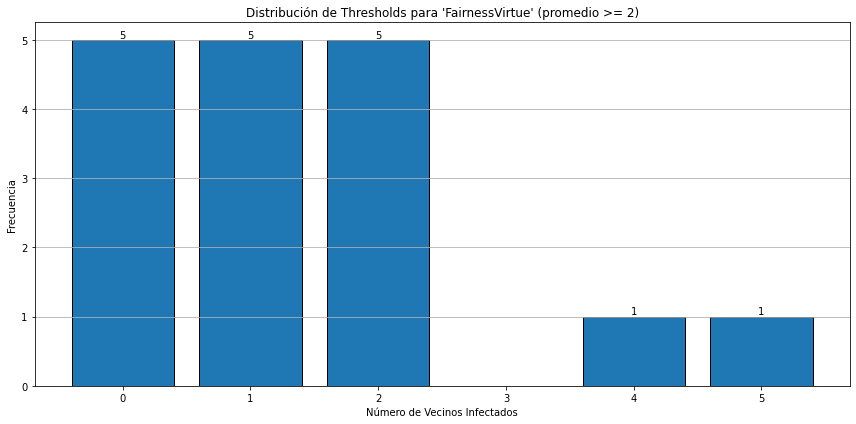

In [37]:
# Crear un conjunto para mantener los nodos infectados
nodos_infectados_totales = set()
infeccion_por_vecinos = []

for num in range(len(dias_consecutivos_mas_largos)):
    fecha_actual = dias_consecutivos_mas_largos.iloc[num]
    nodos_infectados_dia = df_mdf[df_mdf['fecha'] == fecha_actual].groupby('nodo')['FairnessVirtue'].mean() # promedio de mensajes
    nodos_infectados_dia = nodos_infectados_dia[nodos_infectados_dia >= 2].index
    
    for nodo in nodos_infectados_dia:
        if nodo not in nodos_infectados_totales:
            # Verificar si el nodo tenía vecinos infectados en los días anteriores
            vecinos = set(grafo.neighbors(nodo))
            vecinos_infectados = vecinos.intersection(nodos_infectados_totales)
            infeccion_por_vecinos.append({'nodo': nodo, 'vecinos_infectados': len(vecinos_infectados)})
    
    nodos_infectados_totales.update(nodos_infectados_dia) 

# Convertir los resultados a un DataFrame
df_infeccion_por_vecinos = pd.DataFrame(infeccion_por_vecinos)

frecuencia_vecinos = df_infeccion_por_vecinos['vecinos_infectados'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
bars = plt.bar(frecuencia_vecinos.index, frecuencia_vecinos.values, edgecolor='black')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), va='bottom', ha='center')
plt.xlabel('Número de Vecinos Infectados')
plt.ylabel('Frecuencia')
plt.title("Distribución de Thresholds para 'FairnessVirtue' (promedio >= 2)")
plt.grid(axis='y')
plt.tight_layout() 
plt.show()

# Start nltk

In [7]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /uufs/chpc.utah.edu/common/home/u6060602/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [9]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

with open("email_body_lay-k.txt", "r") as f:
    data = f.read()


words= word_tokenize(data)

useful_words = [word  for word in words if word not in stopwords.words('english')]

frequency = nltk.FreqDist(useful_words)

print(frequency.most_common(100))

[(',', 82443), ('.', 59620), ('--', 27631), ('*', 27283), ('?', 26239), ('>', 22136), (':', 21640), ('@', 20084), ('Enron', 14537), ('I', 13985), ("'s", 10955), ("''", 10814), (')', 10030), ('(', 9479), ('<', 7817), ('-', 7340), ('The', 7162), (';', 5981), ('company', 5943), ('``', 5718), ('employees', 5234), ('$', 4969), ('energy', 4437), ('To', 4026), ('made', 4000), ('=20', 3927), ('would', 3846), ('California', 3737), ('Lay', 3468), ('consumers', 3441), ('Ken', 3402), ('http', 3213), ('Please', 3201), ('We', 3053), ('&', 3048), ('million', 2866), ('!', 2678), ('stock', 2671), ('Mr.', 2621), ('pay', 2491), ('funds', 2393), ('retirement', 2329), ('bills', 2298), ('bankruptcy', 2297), ('millions', 2294), ('donate', 2260), ('declared', 2250), ("n't", 2217), ('year', 2201), ('New', 2199), ('As', 2199), ('ENRON', 2182), ('help', 2154), ('information', 2096), ('know', 2086), ('last', 2063), ('time', 2040), ('well', 2001), ('If', 1933), ('us', 1911), ('many', 1900), ("'", 1894), ('please',